<a href="https://colab.research.google.com/github/SaimaRawshan/House-Price-Prediction-Models/blob/main/House_price_prediction_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split

# Reading the dataset

In [ ]:
data =pd.read_csv('train.csv')

In [ ]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

LotShape: General shape of property

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
      

# Statistical value of the dataset
Example
count by column, mean by column e.t.c

In [ ]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

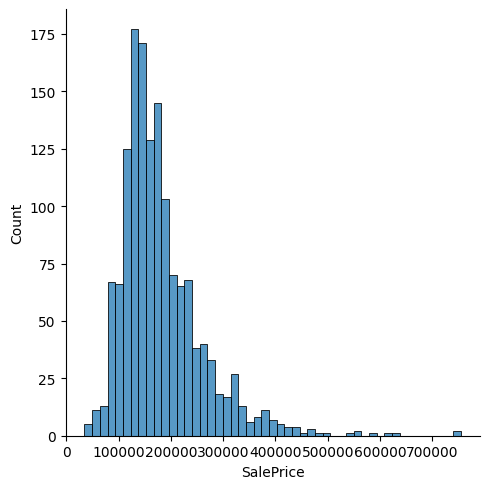

In [ ]:
sb.displot(data['SalePrice']);

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


So the skew is positively skewed and the Kurtosis is leptokurtic.

# Check the missing value in percentage

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageQual       81  0.055479
GarageFinish     81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtCond         37  0.025342
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
Condition2        0  0.000000

# Dropping columns who have more than 30 in missing percentage

There are many missing values. The columns with more than 30% missing data is not going to help us predict the house price.  

In [ ]:
data2 = data.drop('Id', axis=1)
data2.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  

[3 rows x 80 columns]

In [ ]:
data2=data.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC','Fence','MiscFeature', ], axis='columns')
data2.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 75 columns]

# Dropping null values

In [ ]:
data2 = data2.dropna()

Graphical representation to check null value

<Axes: >

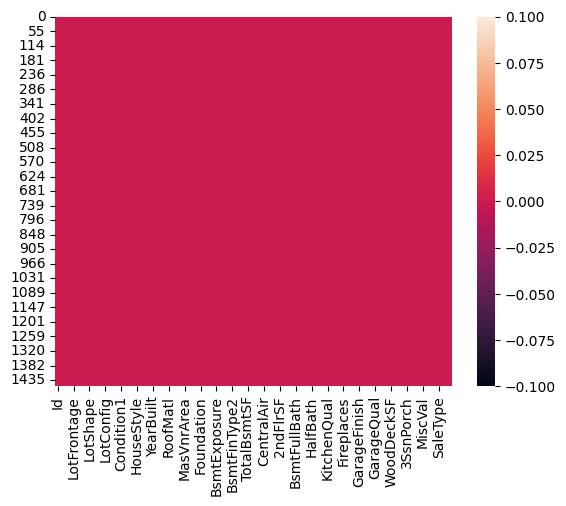

In [ ]:
sb.heatmap(data2.isnull())

As the color of the heatmap is same that means the dataset is now completely devoid of null values.

In [ ]:
data.shape

(1460, 81)

In [ ]:
data3=data2
data3.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

## Exploratory Data Analysis

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler


for col in data3.columns:
    if data3[col].dtype == 'object' or data3[col].dtype=='category':
        data3[col]=LabelEncoder().fit_transform(data3[col])

# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# categorical_cols = data3.select_dtypes(include=['object', 'category']).columns

# encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# data3_encoded = encoder.fit_transform(data3[categorical_cols])
# test3_encoded = encoder.transform(test3[categorical_cols])

# data3_encoded = pd.DataFrame(data3_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=data3.index)
# test3_encoded = pd.DataFrame(test3_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=test3.index)

# data3 = pd.concat([data3.drop(categorical_cols, axis=1), data3_encoded], axis=1)
# test3 = pd.concat([test3.drop(categorical_cols, axis=1), test3_encoded], axis=1)


# data3.head(10)

# Scatter plot

Getting the scatter plot of every columns with SalePrice

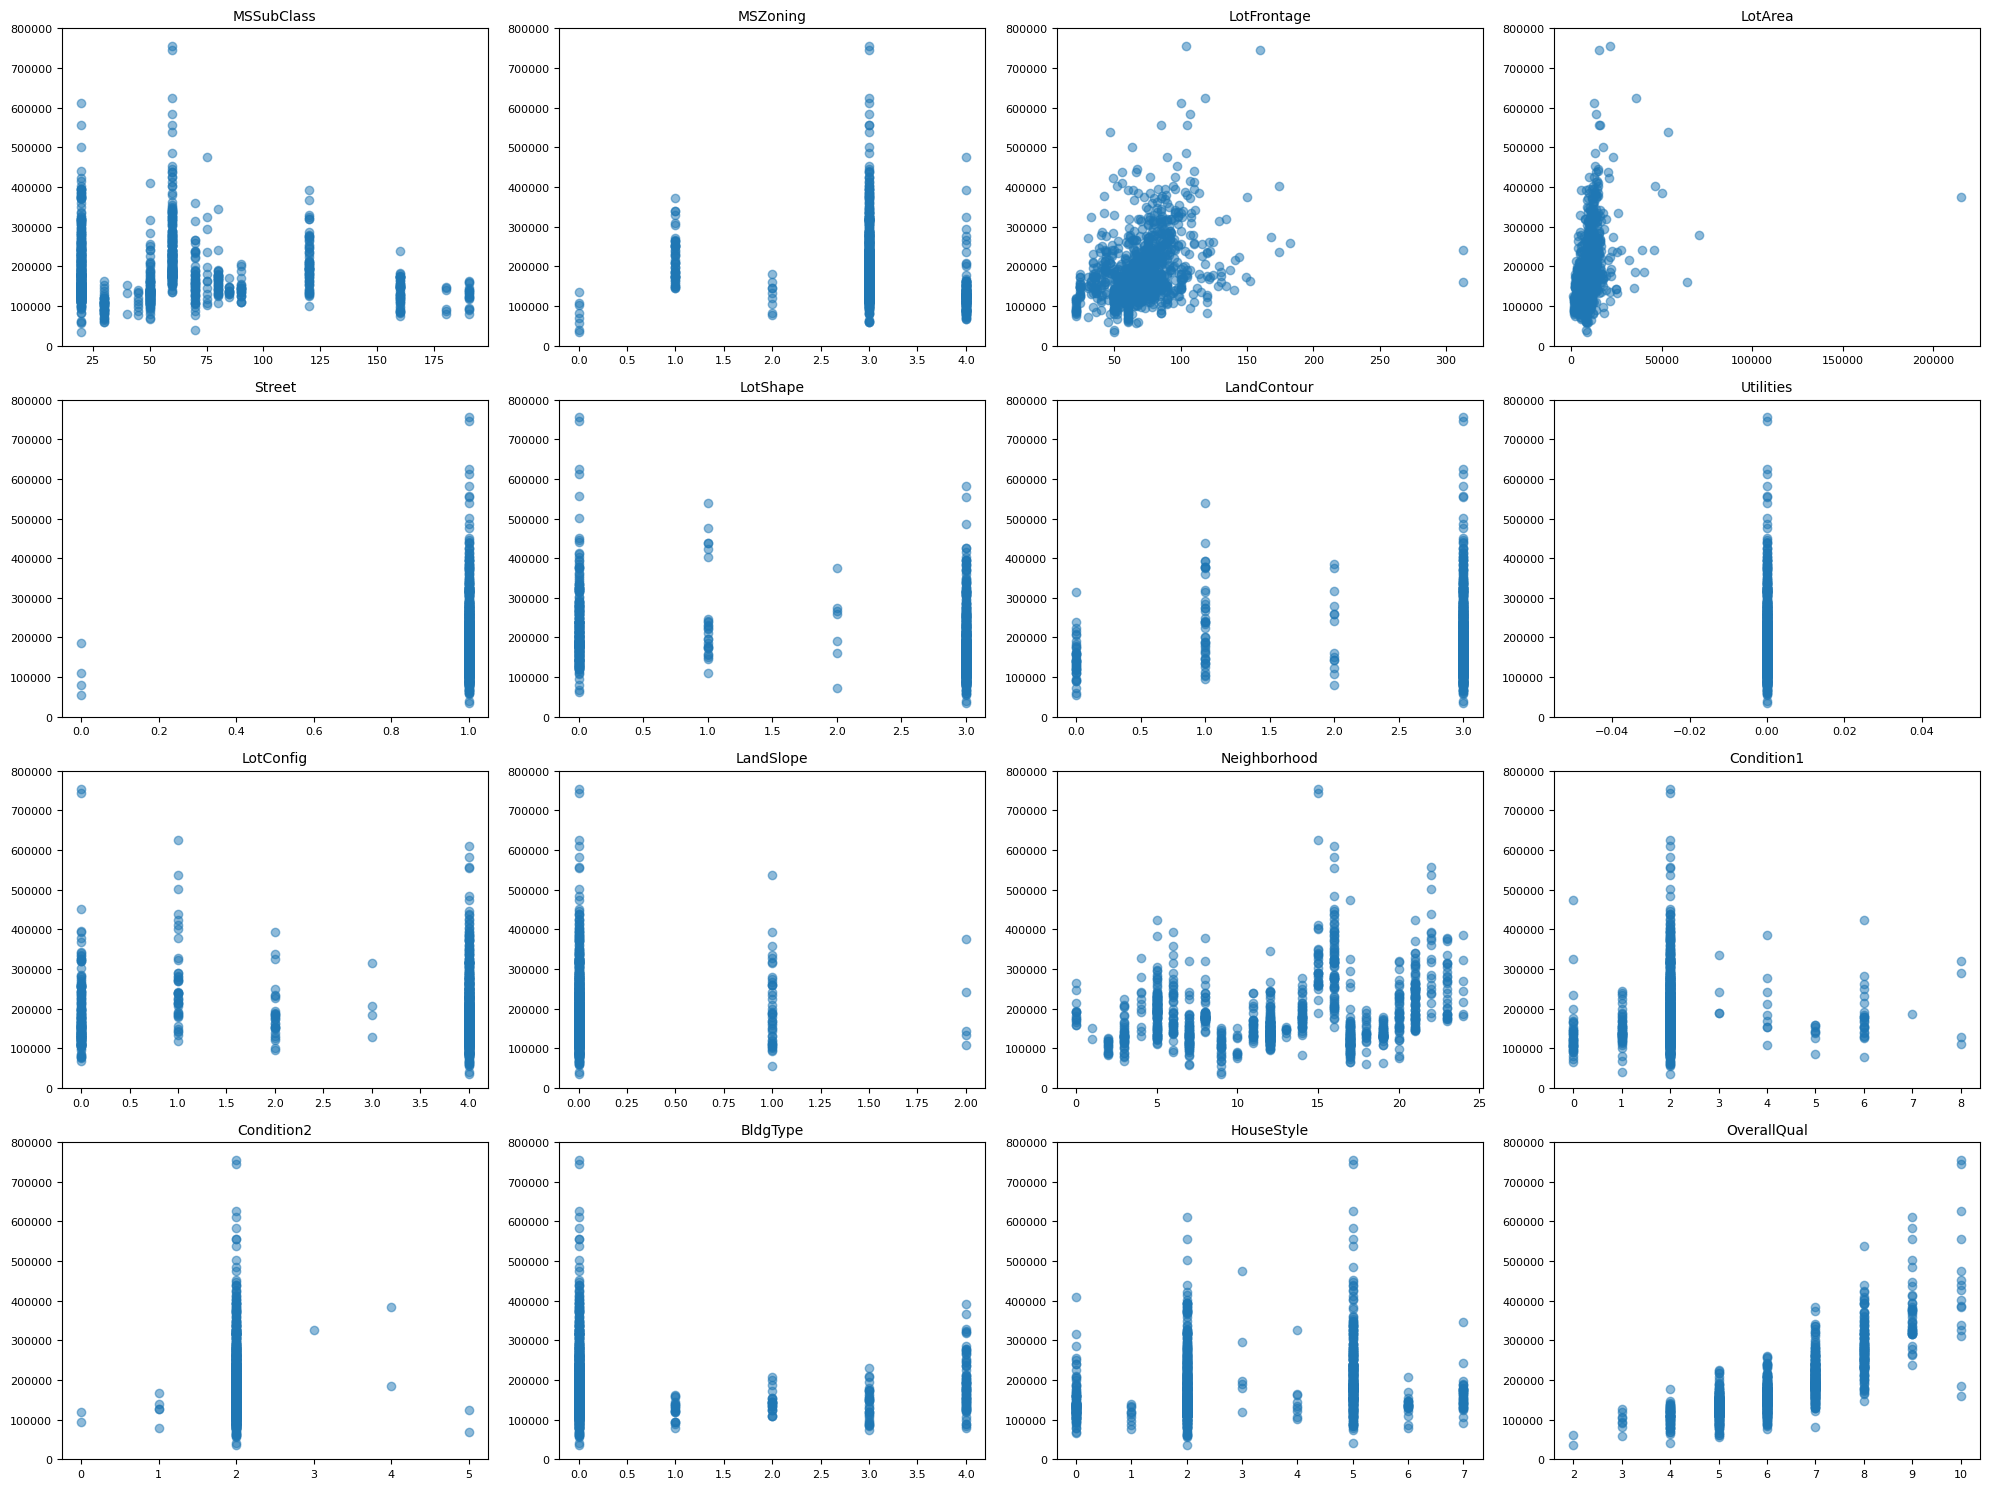

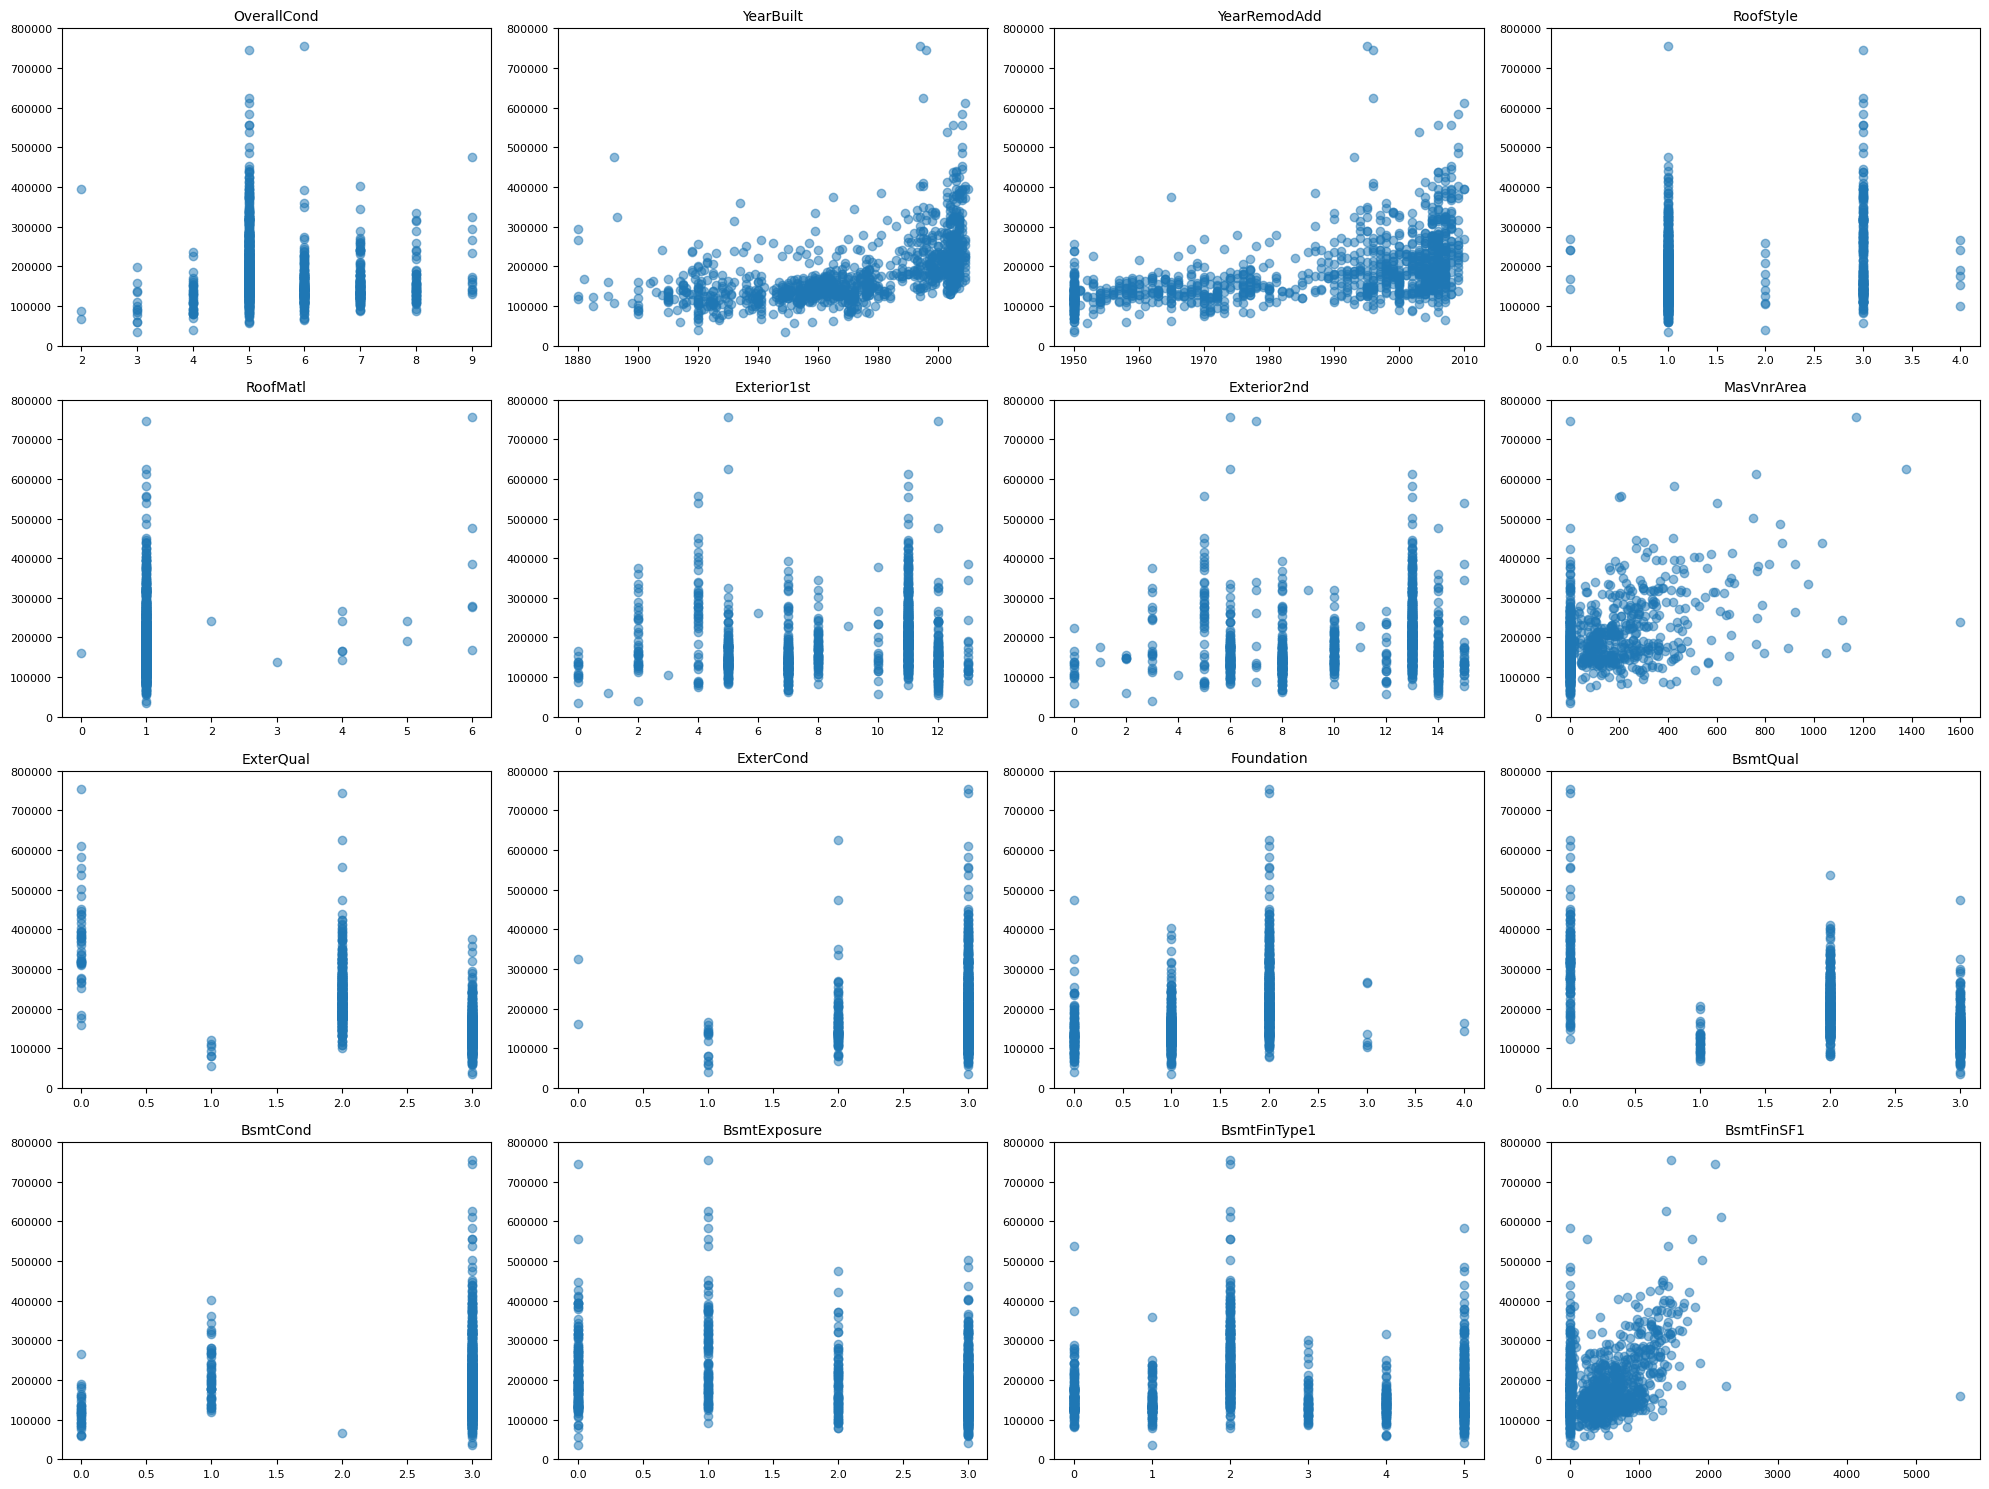

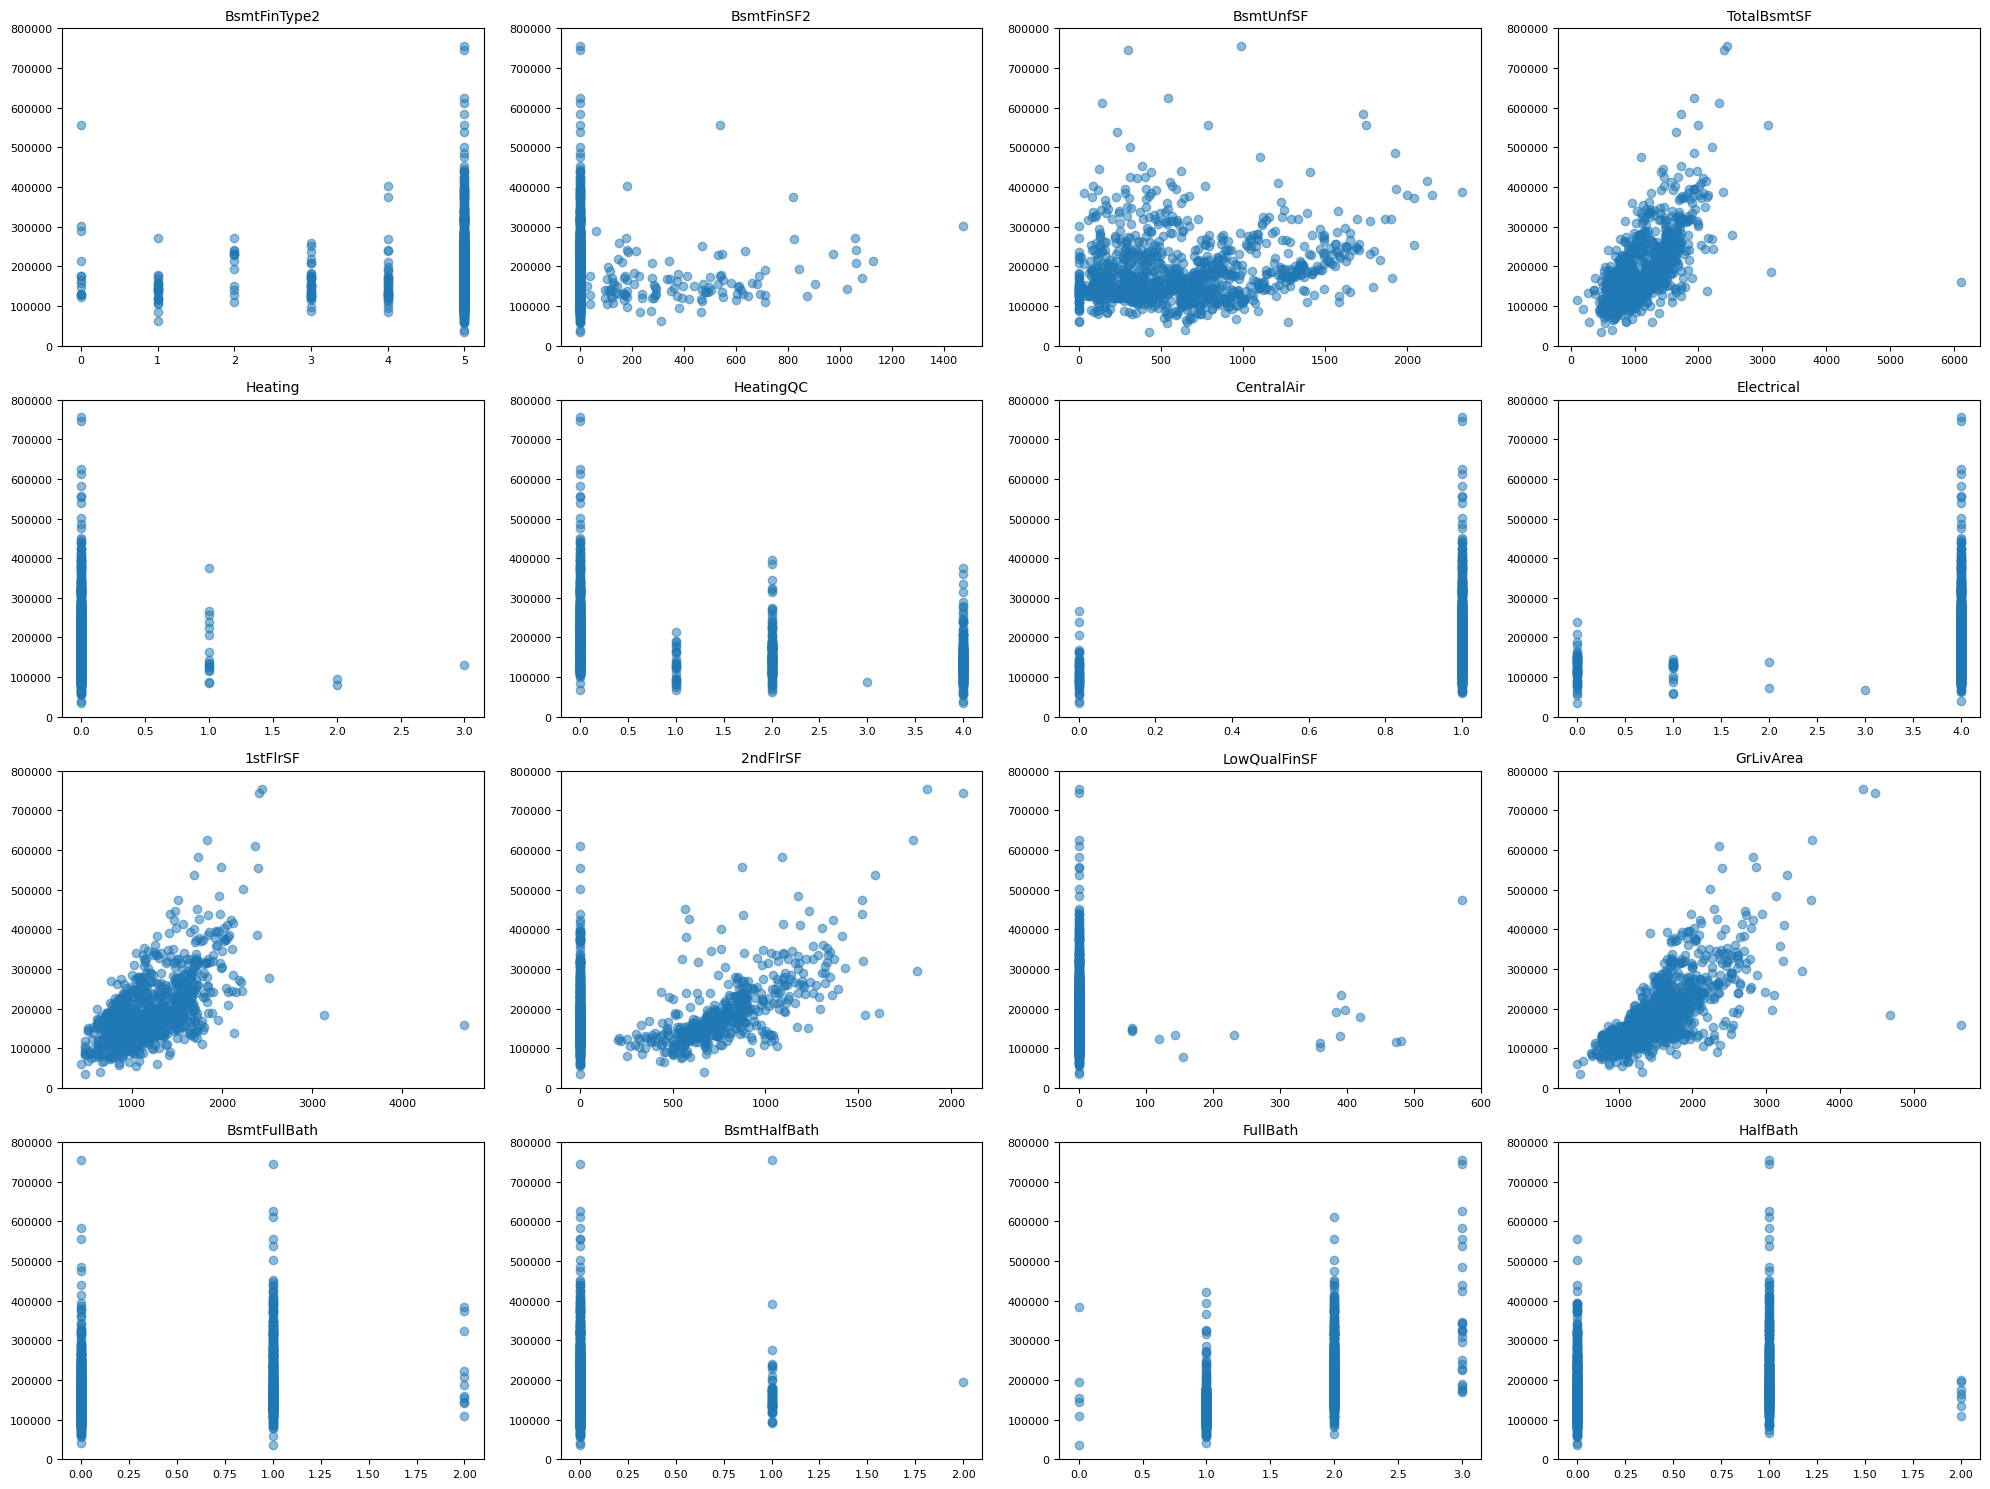

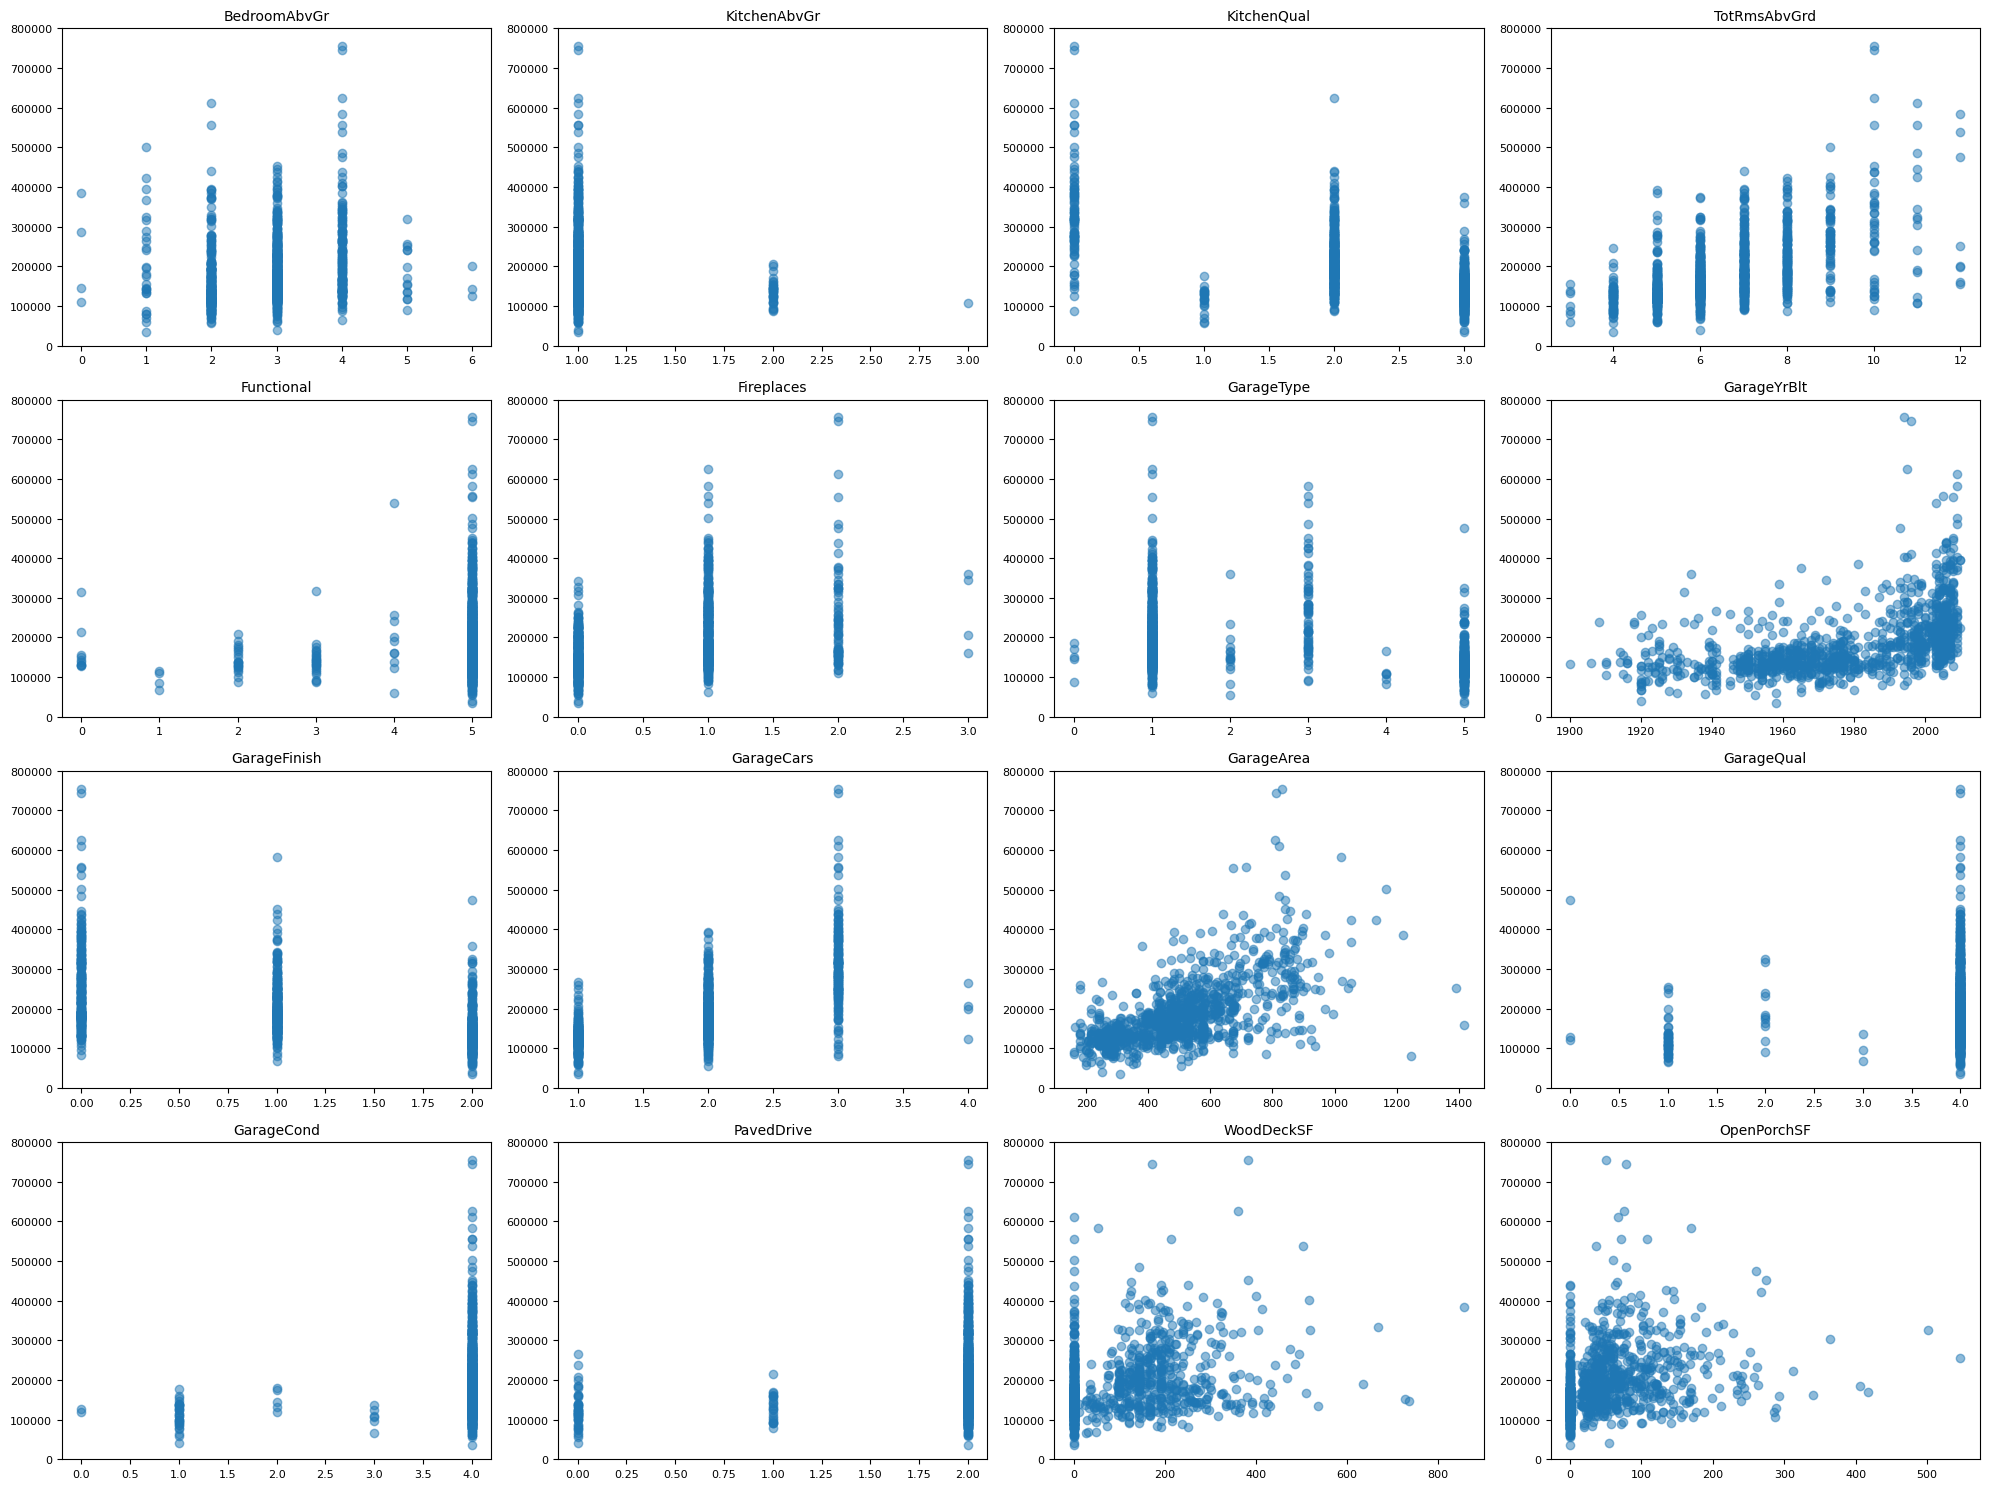

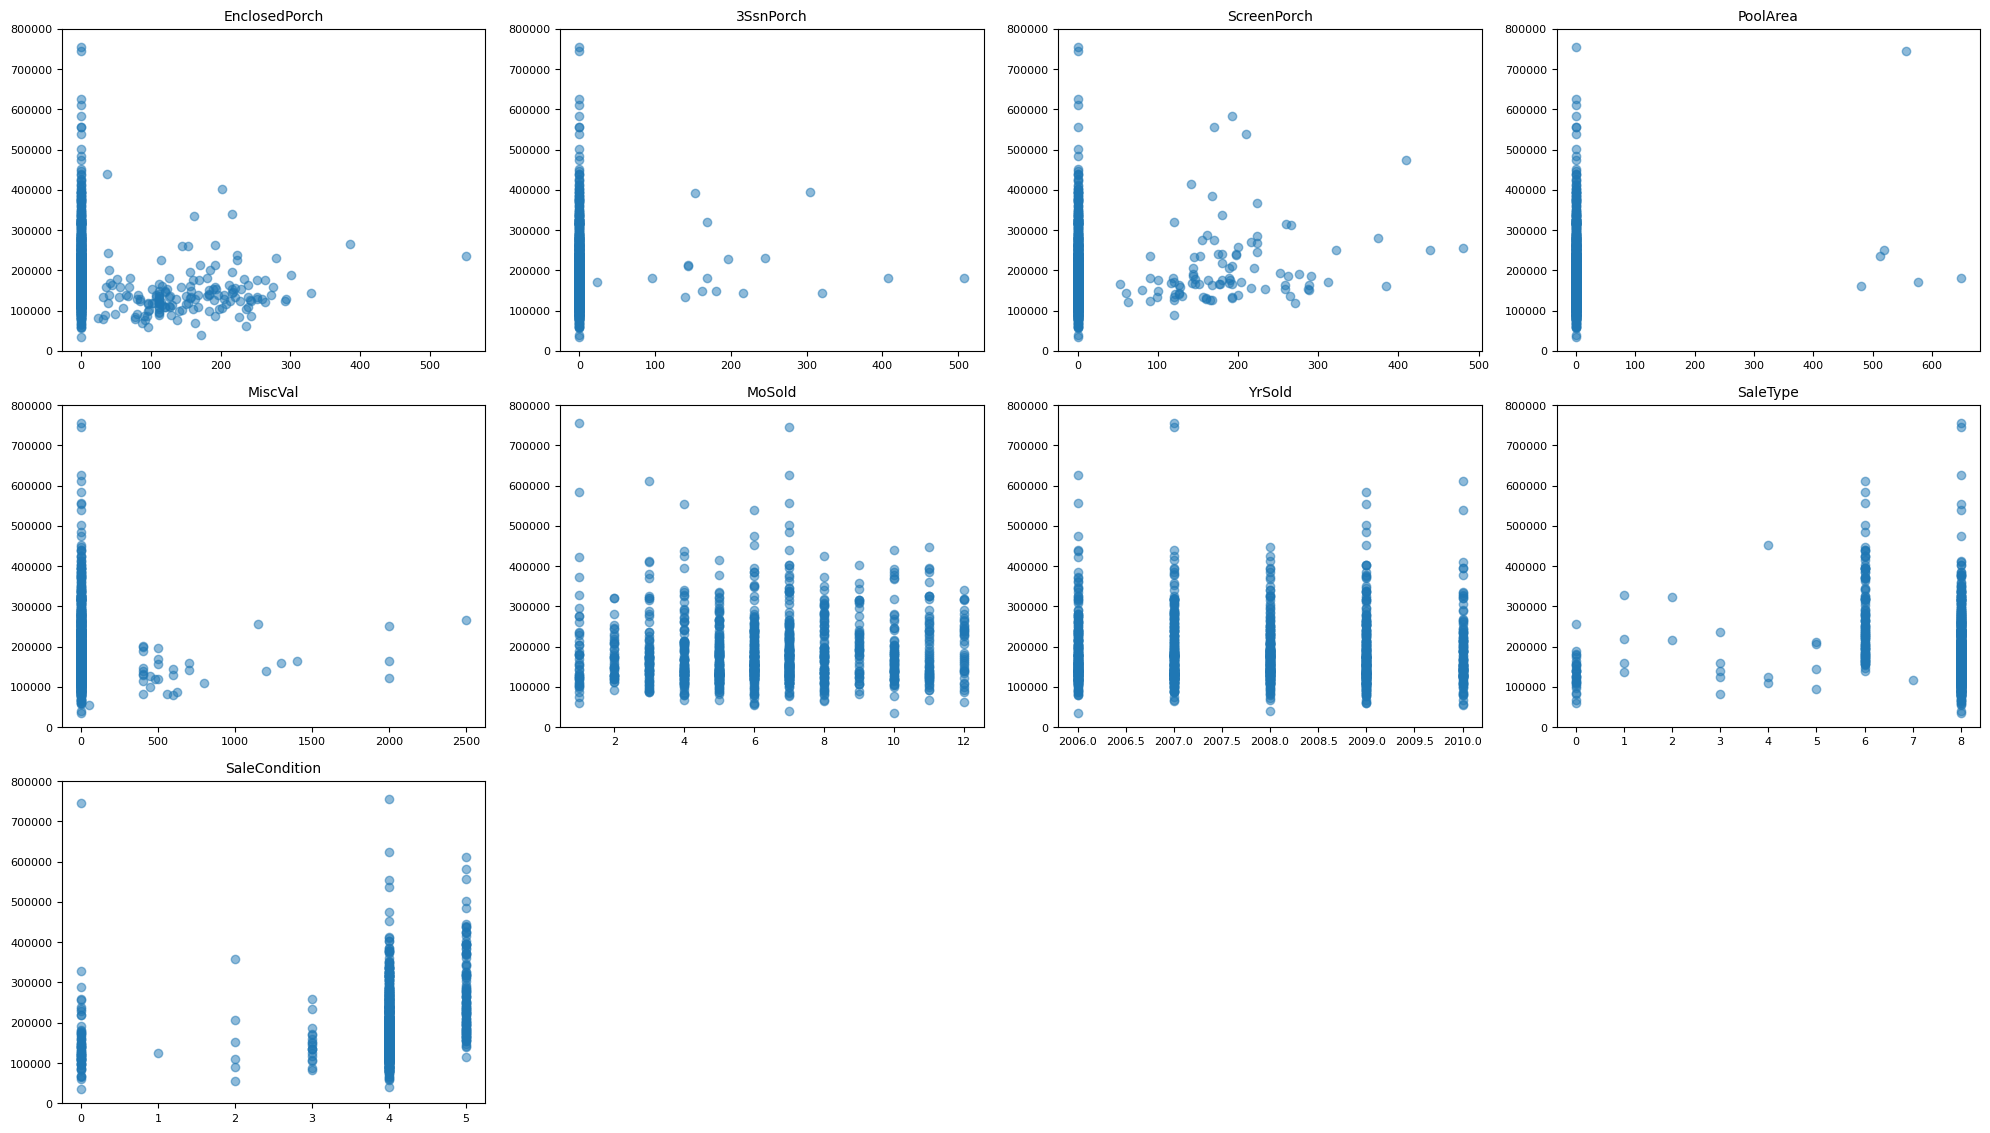

In [ ]:
numeric_cols = data3.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop(['Id', 'SalePrice'])

plots_per_page = 16
rows, cols = 4, 4

for start in range(0, len(numeric_cols), plots_per_page):
    end = start + plots_per_page
    subset = numeric_cols[start:end]

    fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
    axes = axes.flatten()

    for i, col in enumerate(subset):
        axes[i].scatter(data3[col], data3['SalePrice'], alpha=0.5)
        axes[i].set_title(col, fontsize=10)
        axes[i].set_ylim(0, 800000)
        axes[i].tick_params(axis='both', which='major', labelsize=8)

    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


# Histogram

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'Street'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>,
        <Axes: title={'center': 'Utilities'}>,
        <Axes: title={'center': 'LotConfig'}>],
       [<Axes: title={'center': 'LandSlope'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>,
        <Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'RoofStyle'}>,
        <Axes: title={'center': 'RoofMatl'}>,
  

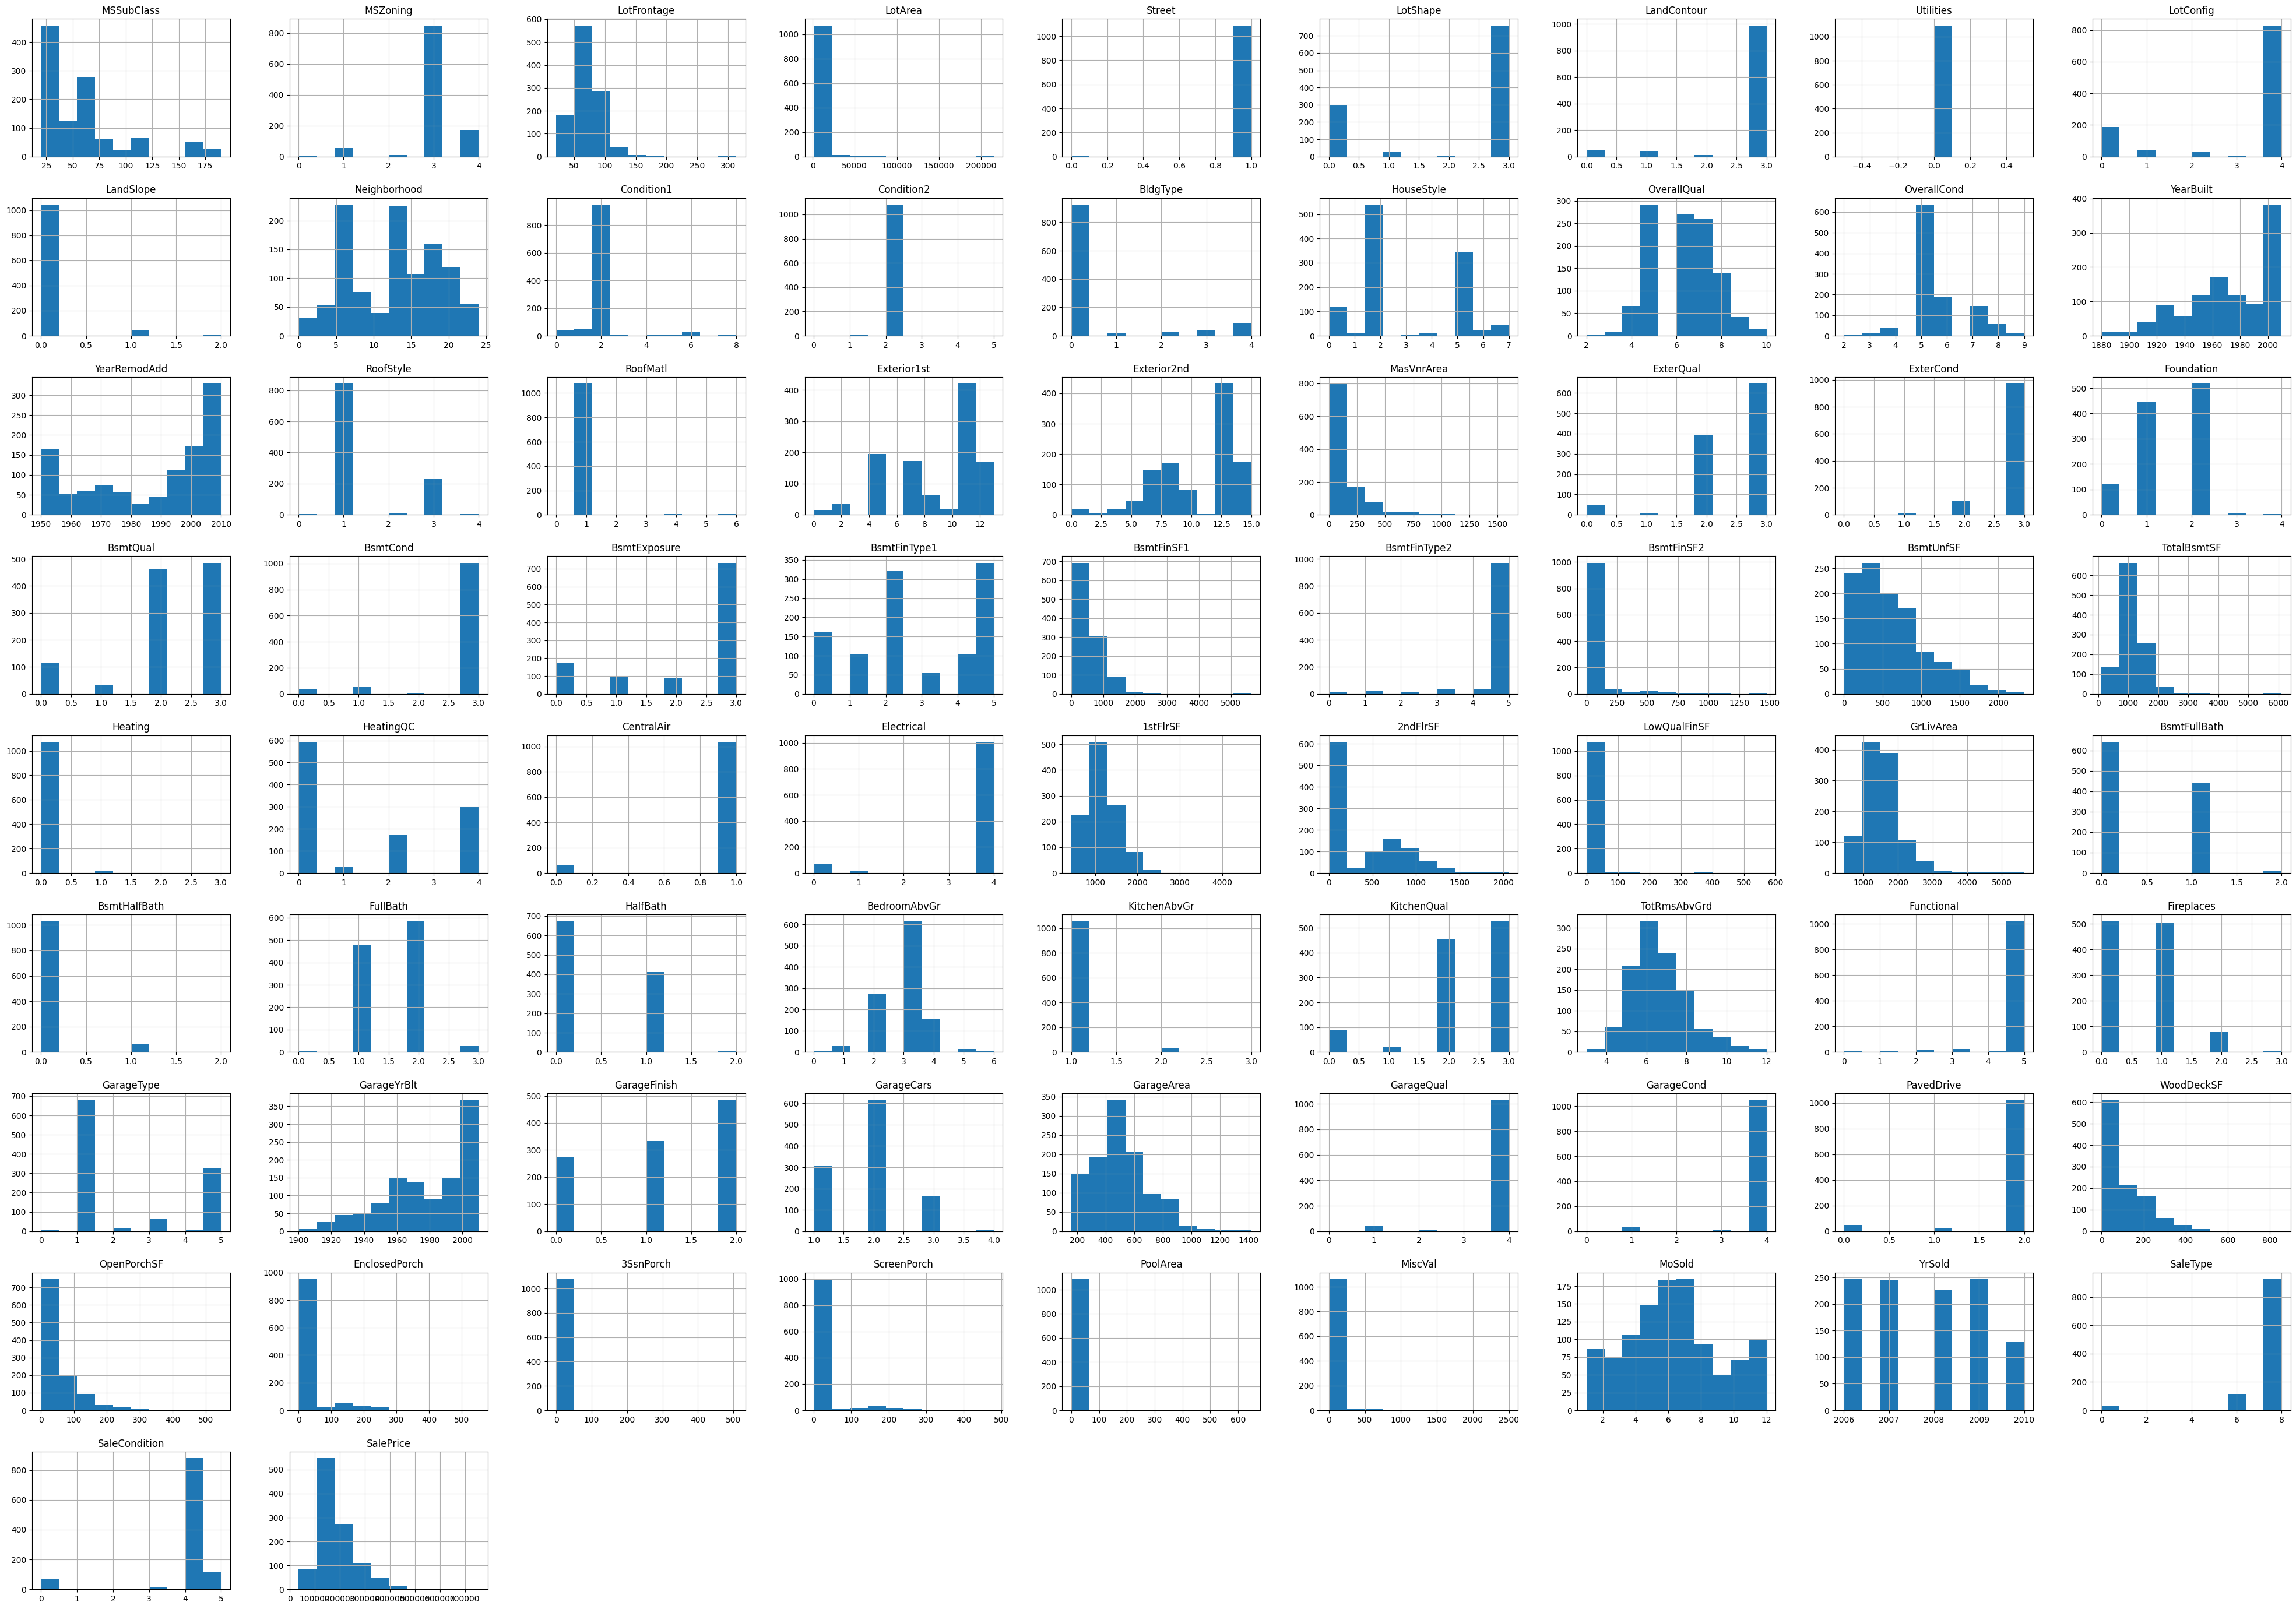

In [ ]:
numeric_cols = data3.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop(['Id'])
data3[numeric_cols].hist(figsize = (50,35))

# Correlation

In [ ]:
data3.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.015540 -0.004552    -0.014479 -0.042315   
MSSubClass     0.015540    1.000000  0.030073    -0.389466 -0.197903   
MSZoning      -0.004552    0.030073  1.000000    -0.097289 -0.035731   
LotFrontage   -0.014479   -0.389466 -0.097289     1.000000  0.419714   
LotArea       -0.042315   -0.197903 -0.035731     0.419714  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.007486   -0.025393 -0.020595     0.014951  0.006270   
YrSold         0.005307   -0.012347 -0.030517     0.013366 -0.006412   
SaleType       0.018755   -0.003957  0.111368    -0.026790  0.011657   
SaleCondition  0.015216   -0.022491 -0.001727     0.050027  0.056401   
SalePrice     -0.047595   -0.089478 -0.168449     0.343978  0.302268   

                 Street  LotShape  LandContour  Utilities  LotConfig  ...  \
Id            -0.007324  0.020119    -0.015032        NaN   0.065797  ...   
MSSubClass     0.023287  0.085810     0.013368        NaN   0.065471  ...   
MSZoning       0.118349  0.055222    -0.021917        NaN  -0.027070  ...   
LotFrontage   -0.038923 -0.163392    -0.077012        NaN  -0.196166  ...   
LotArea       -0.054958 -0.162483    -0.137701        NaN  -0.077400  ...   
...                 ...       ...          ...        ...        ...  ...   
MoSold         0.007545 -0.058686     0.015168        NaN   0.026806  ...   
YrSold        -0.043781  0.048080     0.016827        NaN  -0.033825  ...   
SaleType       0.028487 -0.010195    -0.038044        NaN   0.004205  ...   
SaleCondition  0.018246 -0.079138    -0.001244        NaN   0.030951  ...   
SalePrice      0.057286 -0.313883     0.008829        NaN  -0.072047  ...   

               EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
Id                  0.011796  -0.061688     0.015019  0.048487  0.050954   
MSSubClass         -0.019313  -0.035855    -0.021854  0.003221 -0.043299   
MSZoning            0.162372   0.002282     0.021552 -0.003301  0.015245   
LotFrontage         0.016058   0.073004     0.034937  0.211959  0.000789   
LotArea            -0.022789   0.013343     0.072413  0.109294  0.012483   
...                      ...        ...          ...       ...       ...   
MoSold             -0.059815   0.023724     0.013459 -0.055290  0.016856   
YrSold             -0.003481   0.025444    -0.002140 -0.054050  0.039380   
SaleType            0.019030  -0.023112     0.035805  0.010928  0.000789   
SaleCondition      -0.135435  -0.008699    -0.006372 -0.067189  0.001945   
SalePrice          -0.161711   0.033947     0.106479  0.092085 -0.036001   

                 MoSold    YrSold  SaleType  SaleCondition  SalePrice  
Id             0.007486  0.005307  0.018755       0.015216  -0.047595  
MSSubClass    -0.025393 -0.012347 -0.003957      -0.022491  -0.089478  
MSZoning      -0.020595 -0.030517  0.111368      -0.001727  -0.168449  
LotFrontage    0.014951  0.013366 -0.026790       0.050027   0.343978  
LotArea        0.006270 -0.006412  0.011657       0.056401   0.302268  
...                 ...       ...       ...            ...        ...  
MoSold         1.000000 -0.152046 -0.044177       0.054197   0.052584  
YrSold        -0.152046  1.000000  0.034963      -0.006714  -0.006723  
SaleType      -0.044177  0.034963  1.000000       0.143611  -0.061219  
SaleCondition  0.054197 -0.006714  0.143611       1.000000   0.226824  
SalePrice      0.052584 -0.006723 -0.061219       0.226824   1.000000  

[75 rows x 75 columns]

# Heatmap

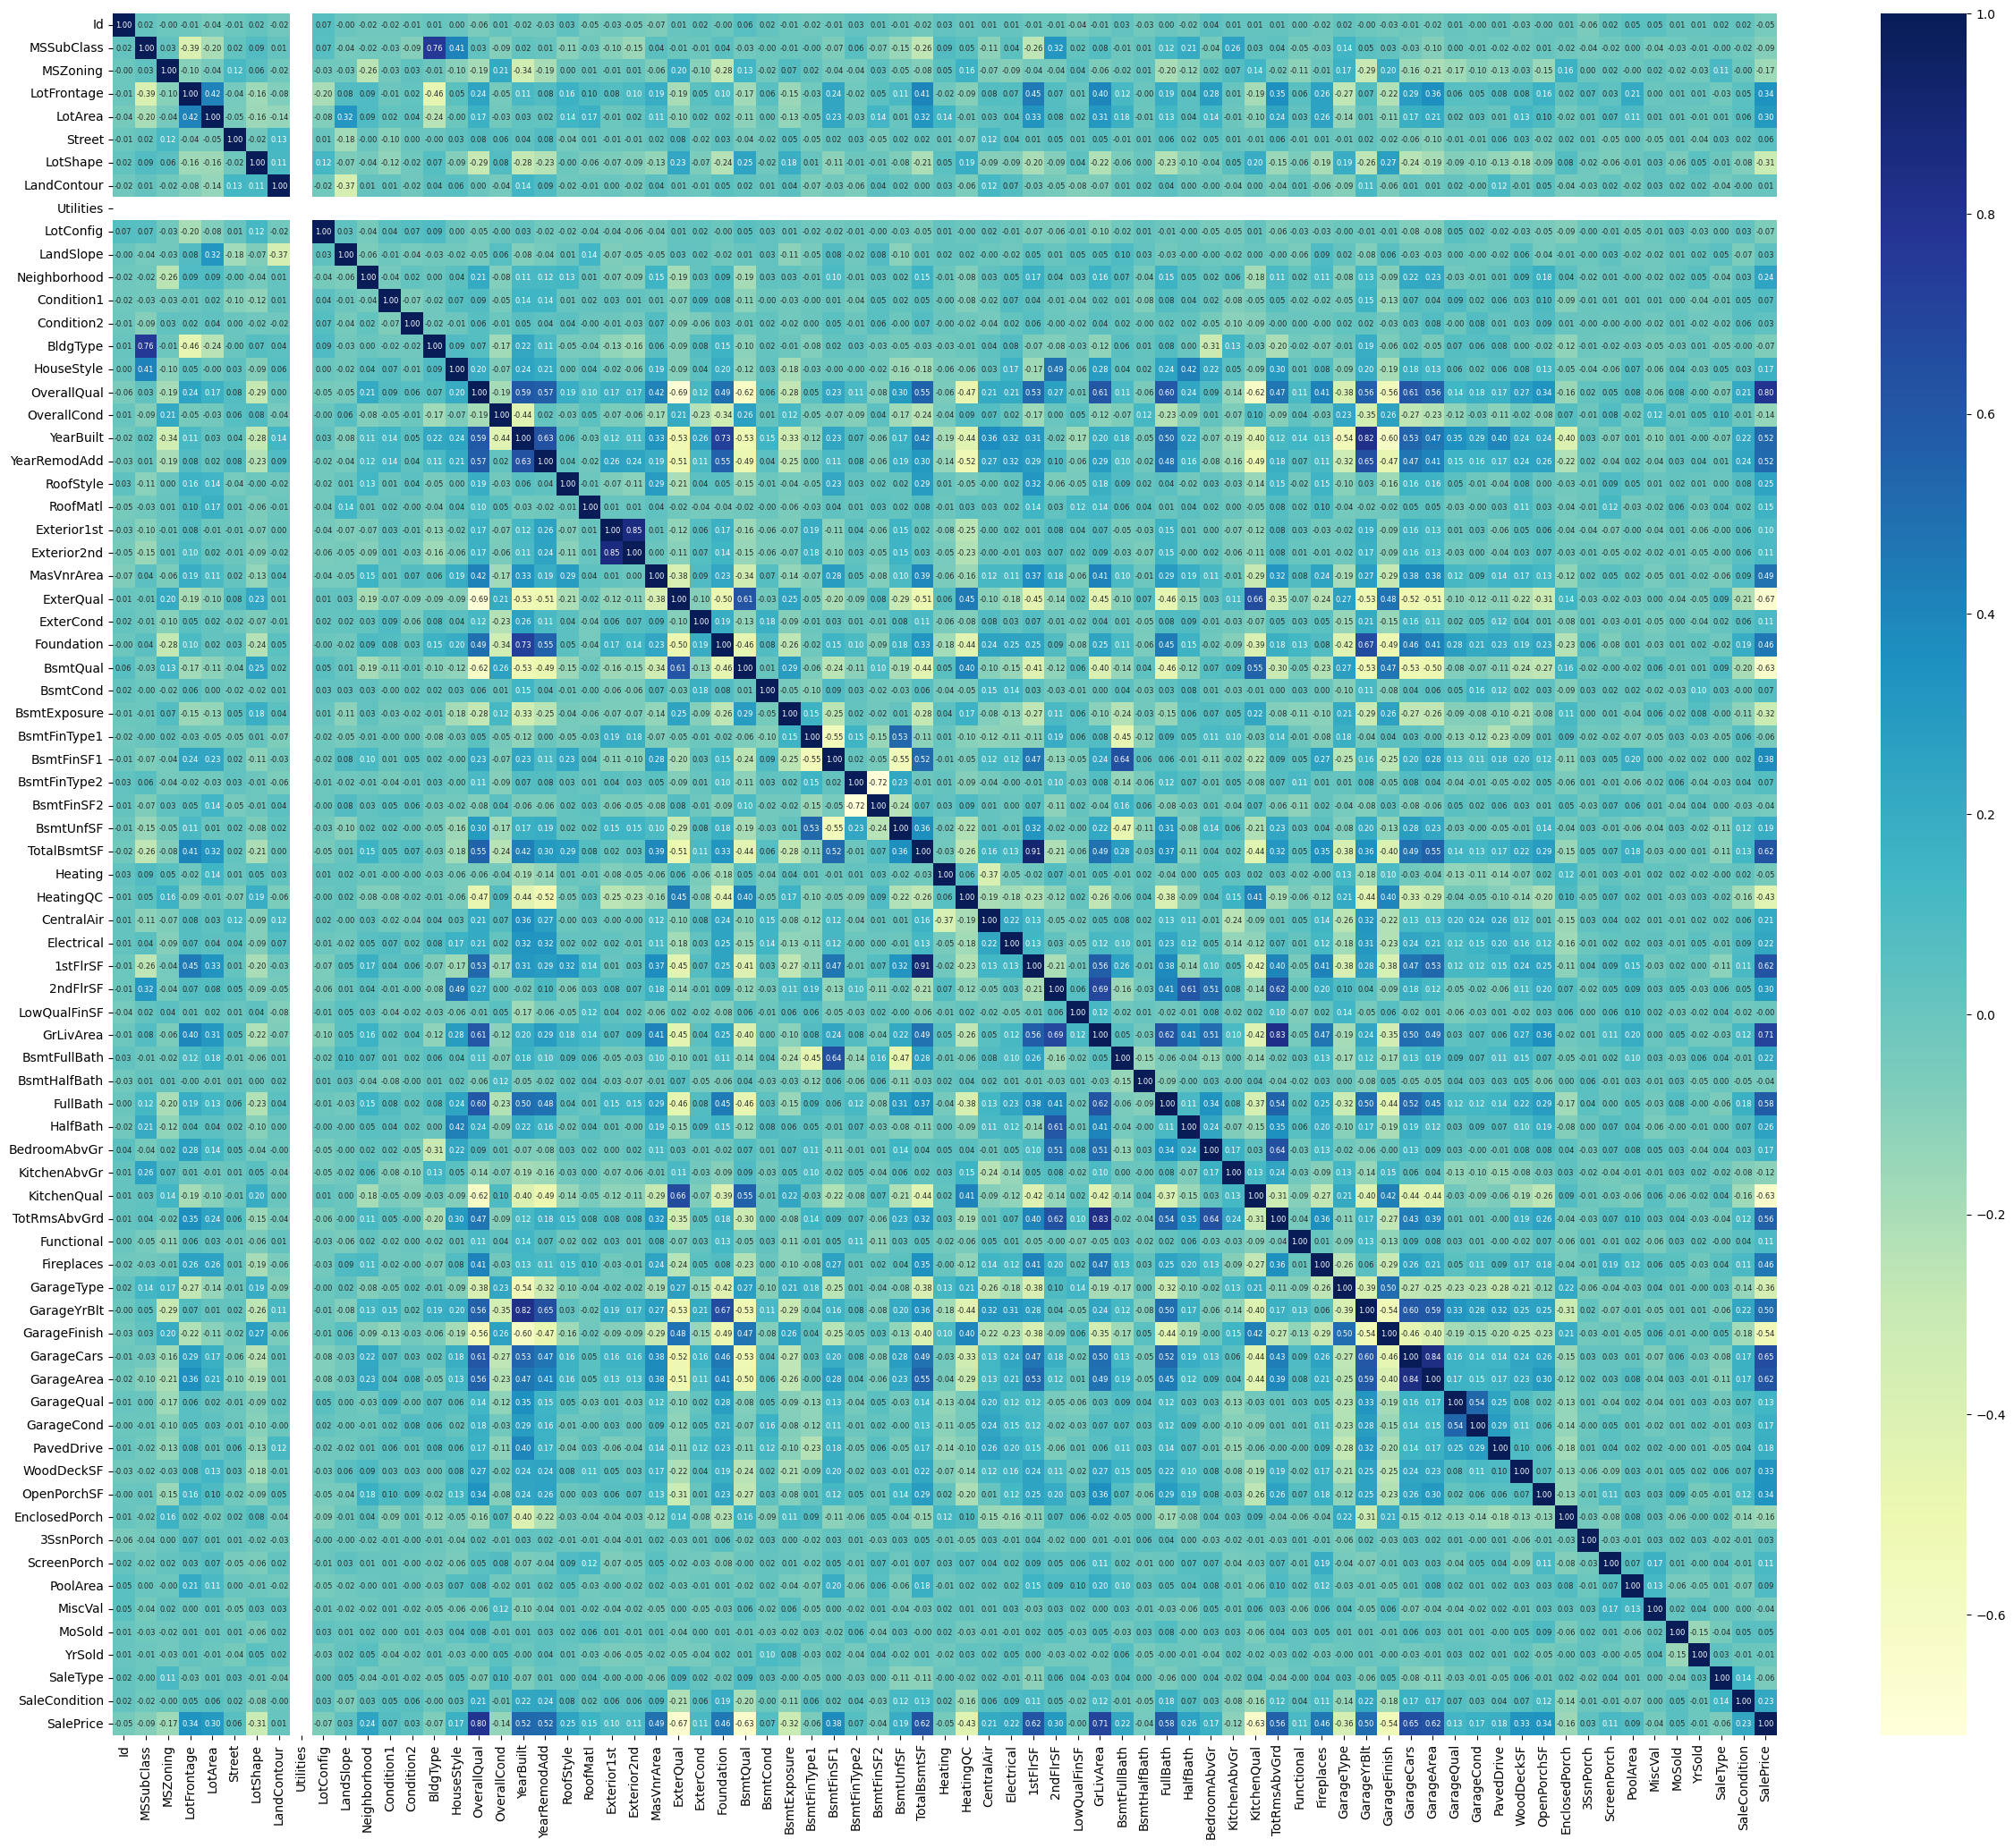

In [ ]:
plt.figure(figsize=(30, 25))
sb.heatmap(data3.corr(), cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size":6})
plt.show()

So utilities has zero correlation with the salePrice

In [ ]:
data3.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [ ]:
data3['Utilities'].unique()

array([0])

And it has 1 unique values.

In [ ]:
data3=data3.drop(["Utilities", ], axis='columns')
data3.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0            3          4          0  ...              0          0   
1            3          2          0  ...              0          0   
2            3          4          0  ...              0          0   
3            3          0          0  ...            272          0   
4            3          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         8              4   
1            0         0        0       5    2007         8              4   
2            0         0        0       9    2008         8              4   
3            0         0        0       2    2006         8              0   
4            0         0        0      12    2008         8              4   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 74 columns]

# Skewness of all the columns

Taking the columns that have numeric values (mostly in sq feet) and applying log transform on them to get a more normalized value and increased accuracy.

Those Columns are -

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

In [ ]:
numeric_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

skewness1 = data3[numeric_cols].skew()
print(skewness1)


LotFrontage       2.227272
LotArea          15.508309
MasVnrArea        2.695262
BsmtFinSF1        1.931425
BsmtFinSF2        4.372440
BsmtUnfSF         0.884701
TotalBsmtSF       2.314581
1stFlrSF          1.371529
2ndFlrSF          0.790156
LowQualFinSF      9.896145
GrLivArea         1.553875
GarageArea        0.726787
WoodDeckSF        1.525006
OpenPorchSF       2.382985
EnclosedPorch     3.165433
3SsnPorch        11.069793
ScreenPorch       3.962075
PoolArea         13.614615
dtype: float64


Applying Log transform on features that have skewness > 1. As no skew values are negative.

In [ ]:
skew_threshold = 1
skewed_feats = skewness1[skewness1 > skew_threshold].index

for col in skewed_feats:
    data3[col] = np.log1p(data3[col])

In [ ]:
numeric_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

skewness2 = data3[numeric_cols].skew()
print(skewness2)

LotFrontage      -0.710598
LotArea          -0.484424
MasVnrArea        0.453399
BsmtFinSF1       -0.630369
BsmtFinSF2        2.565180
BsmtUnfSF         0.884701
TotalBsmtSF      -0.245812
1stFlrSF          0.066786
2ndFlrSF          0.790156
LowQualFinSF      8.014878
GrLivArea         0.073333
GarageArea        0.726787
WoodDeckSF        0.112792
OpenPorchSF      -0.098085
EnclosedPorch     2.108021
3SsnPorch         8.010915
ScreenPorch       2.974511
PoolArea         13.414928
dtype: float64


In [ ]:
# List of numerical features
numeric_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

# Compute skewness before and after transformation
skewness1 = data3[numeric_cols].skew()  # before transformation
skewness2 = data3[numeric_cols].apply(lambda x: np.log1p(x)).skew()  # after log(1+x) transformation

# Create comparison DataFrame
skew_comparison = pd.DataFrame({
    'Feature': numeric_cols,
    'Skewness_Before': skewness1.values,
    'Skewness_After': skewness2.values
})

# Round values for better readability
skew_comparison = skew_comparison.round(2)

# Display the table
print(skew_comparison)


          Feature  Skewness_Before  Skewness_After
0     LotFrontage            -0.71           -1.08
1         LotArea            -0.48           -0.90
2      MasVnrArea             0.45            0.37
3      BsmtFinSF1            -0.63           -0.75
4      BsmtFinSF2             2.57            2.49
5       BsmtUnfSF             0.88           -2.58
6     TotalBsmtSF            -0.25           -0.56
7        1stFlrSF             0.07           -0.05
8        2ndFlrSF             0.79            0.24
9    LowQualFinSF             8.01            7.88
10      GrLivArea             0.07           -0.06
11     GarageArea             0.73           -0.27
12     WoodDeckSF             0.11            0.06
13    OpenPorchSF            -0.10           -0.24
14  EnclosedPorch             2.11            2.06
15      3SsnPorch             8.01            7.89
16    ScreenPorch             2.97            2.95
17       PoolArea            13.41           13.41


Looking at Changed Histogram and Heatmap after applying log transformations on some features.

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'Street'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>,
        <Axes: title={'center': 'LotConfig'}>,
        <Axes: title={'center': 'LandSlope'}>],
       [<Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>,
        <Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'RoofStyle'}>,
        <Axes: title={'center': 'RoofMatl'}>,
        <Axes: title={'center': 'Exterior1st'}>,


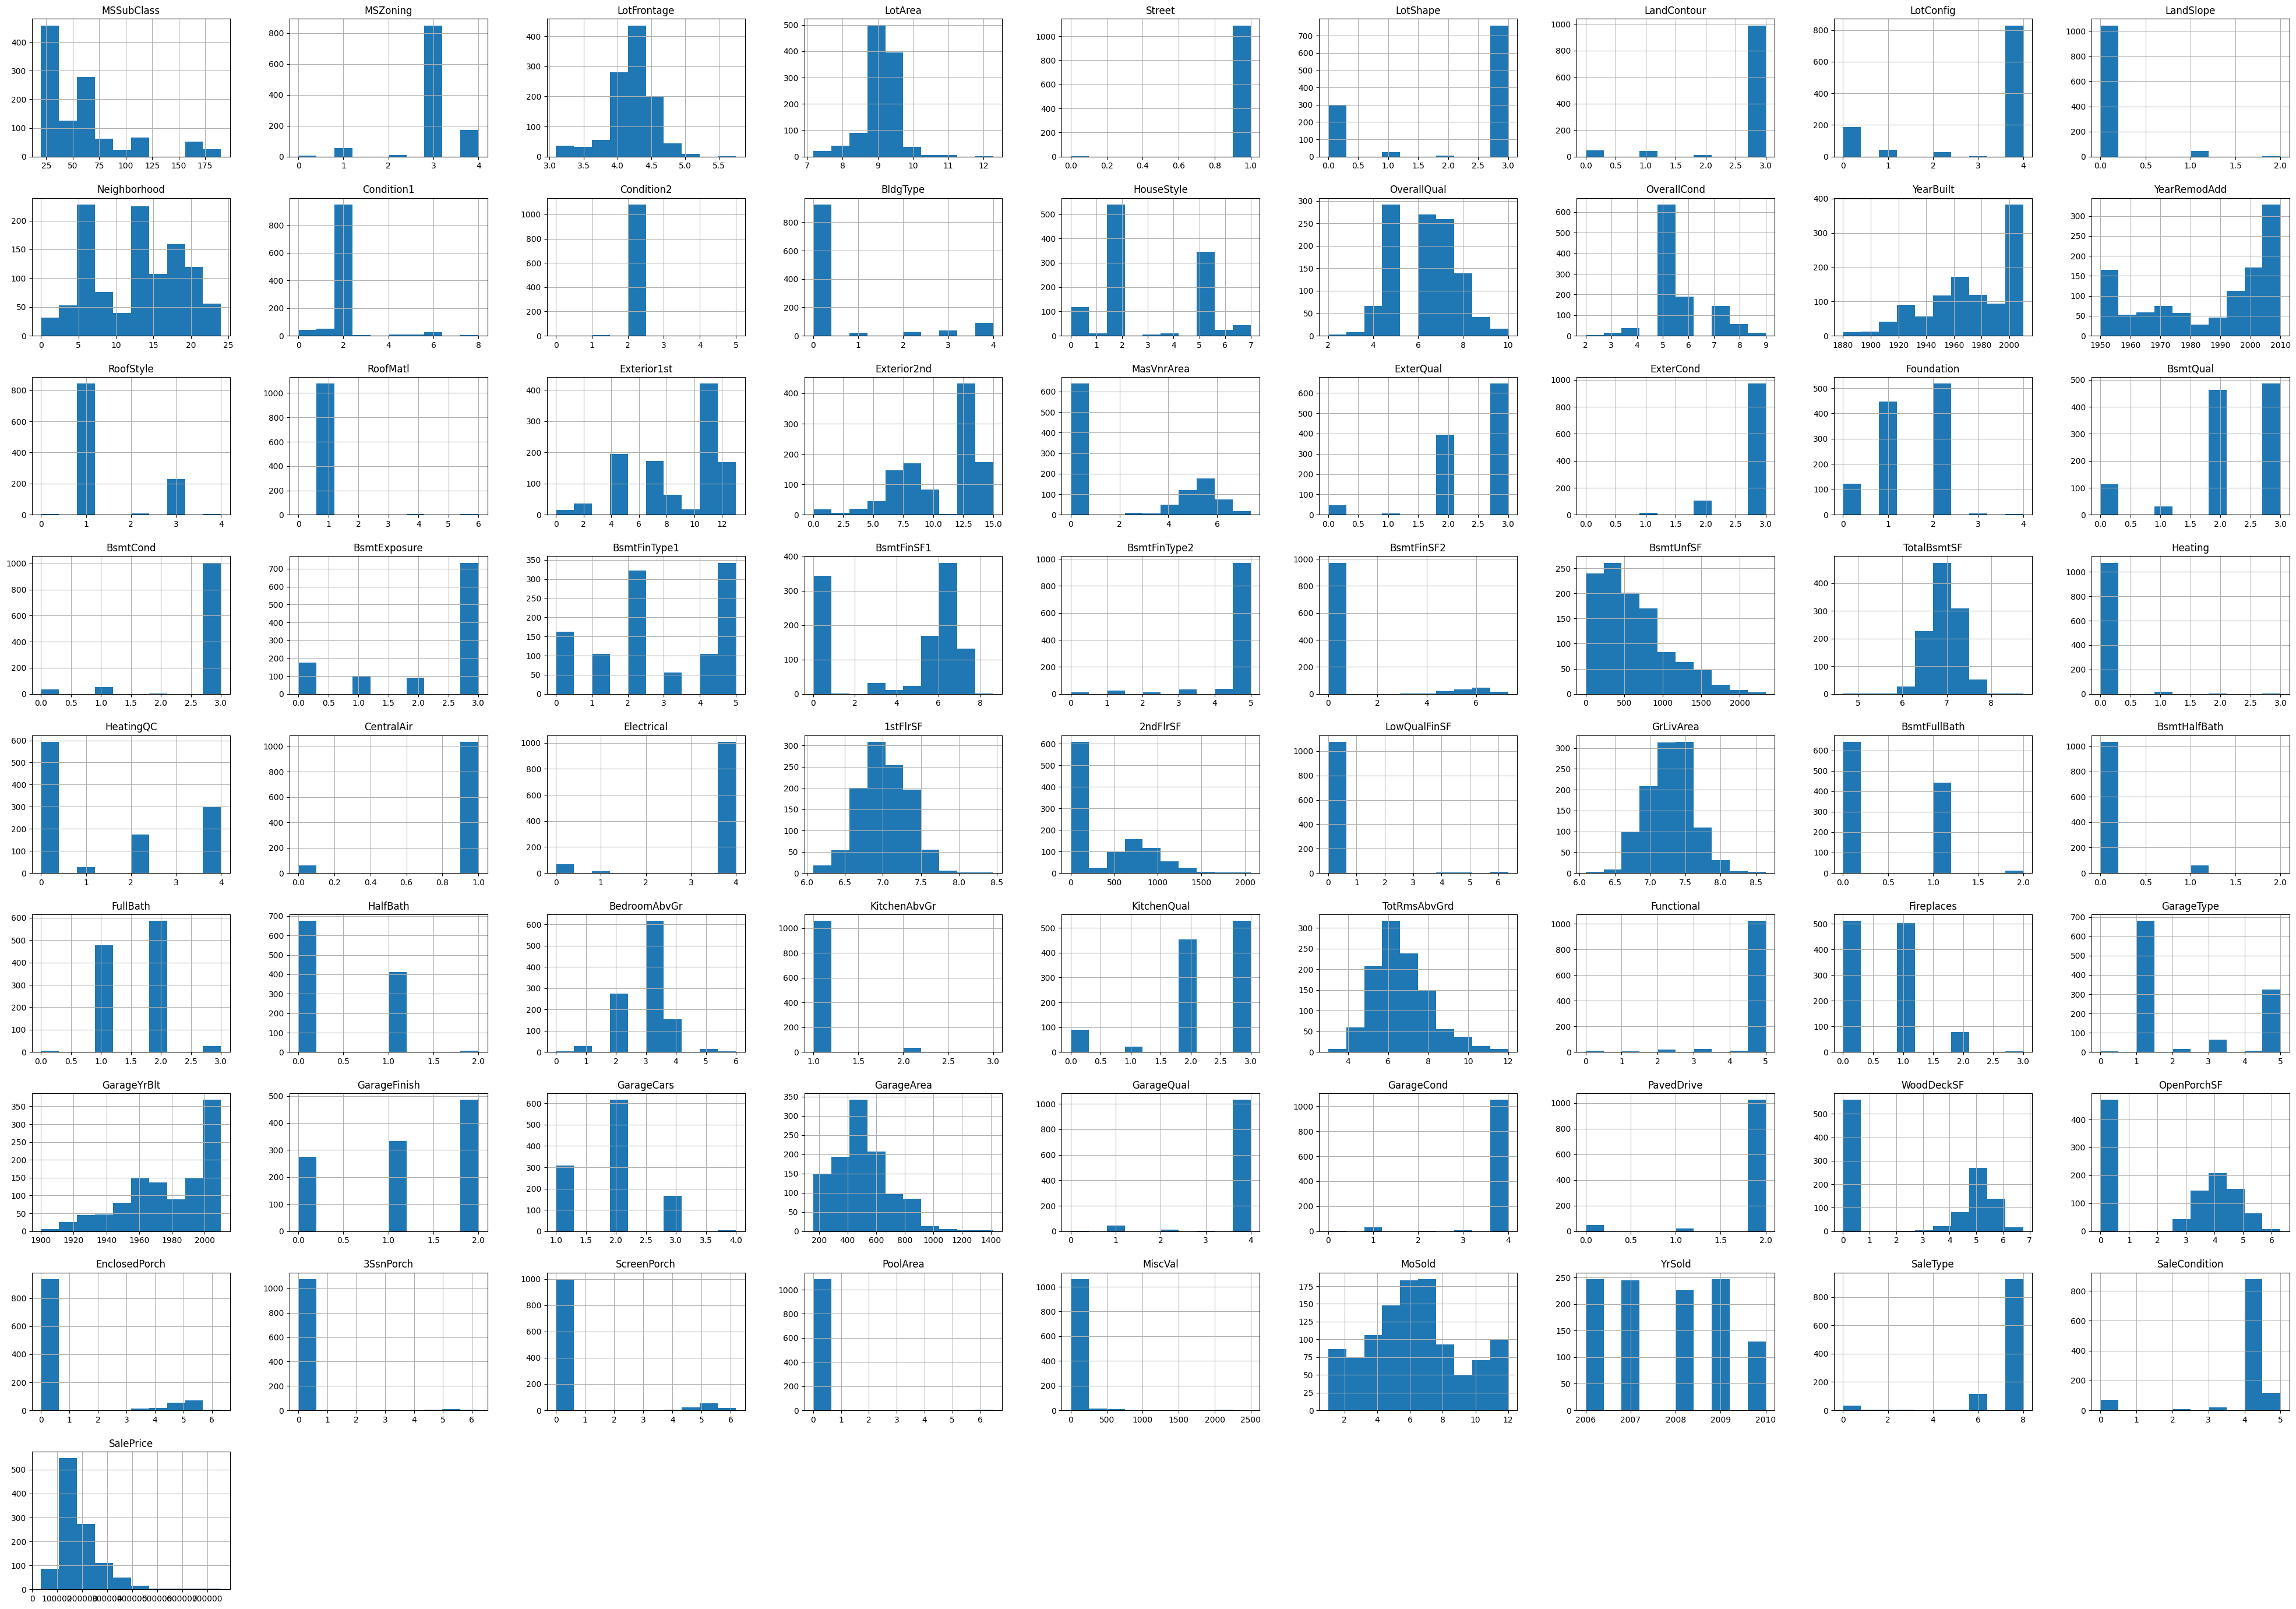

In [ ]:
numeric_cols = data3.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop(['Id'])
data3[numeric_cols].hist(figsize = (50,35))

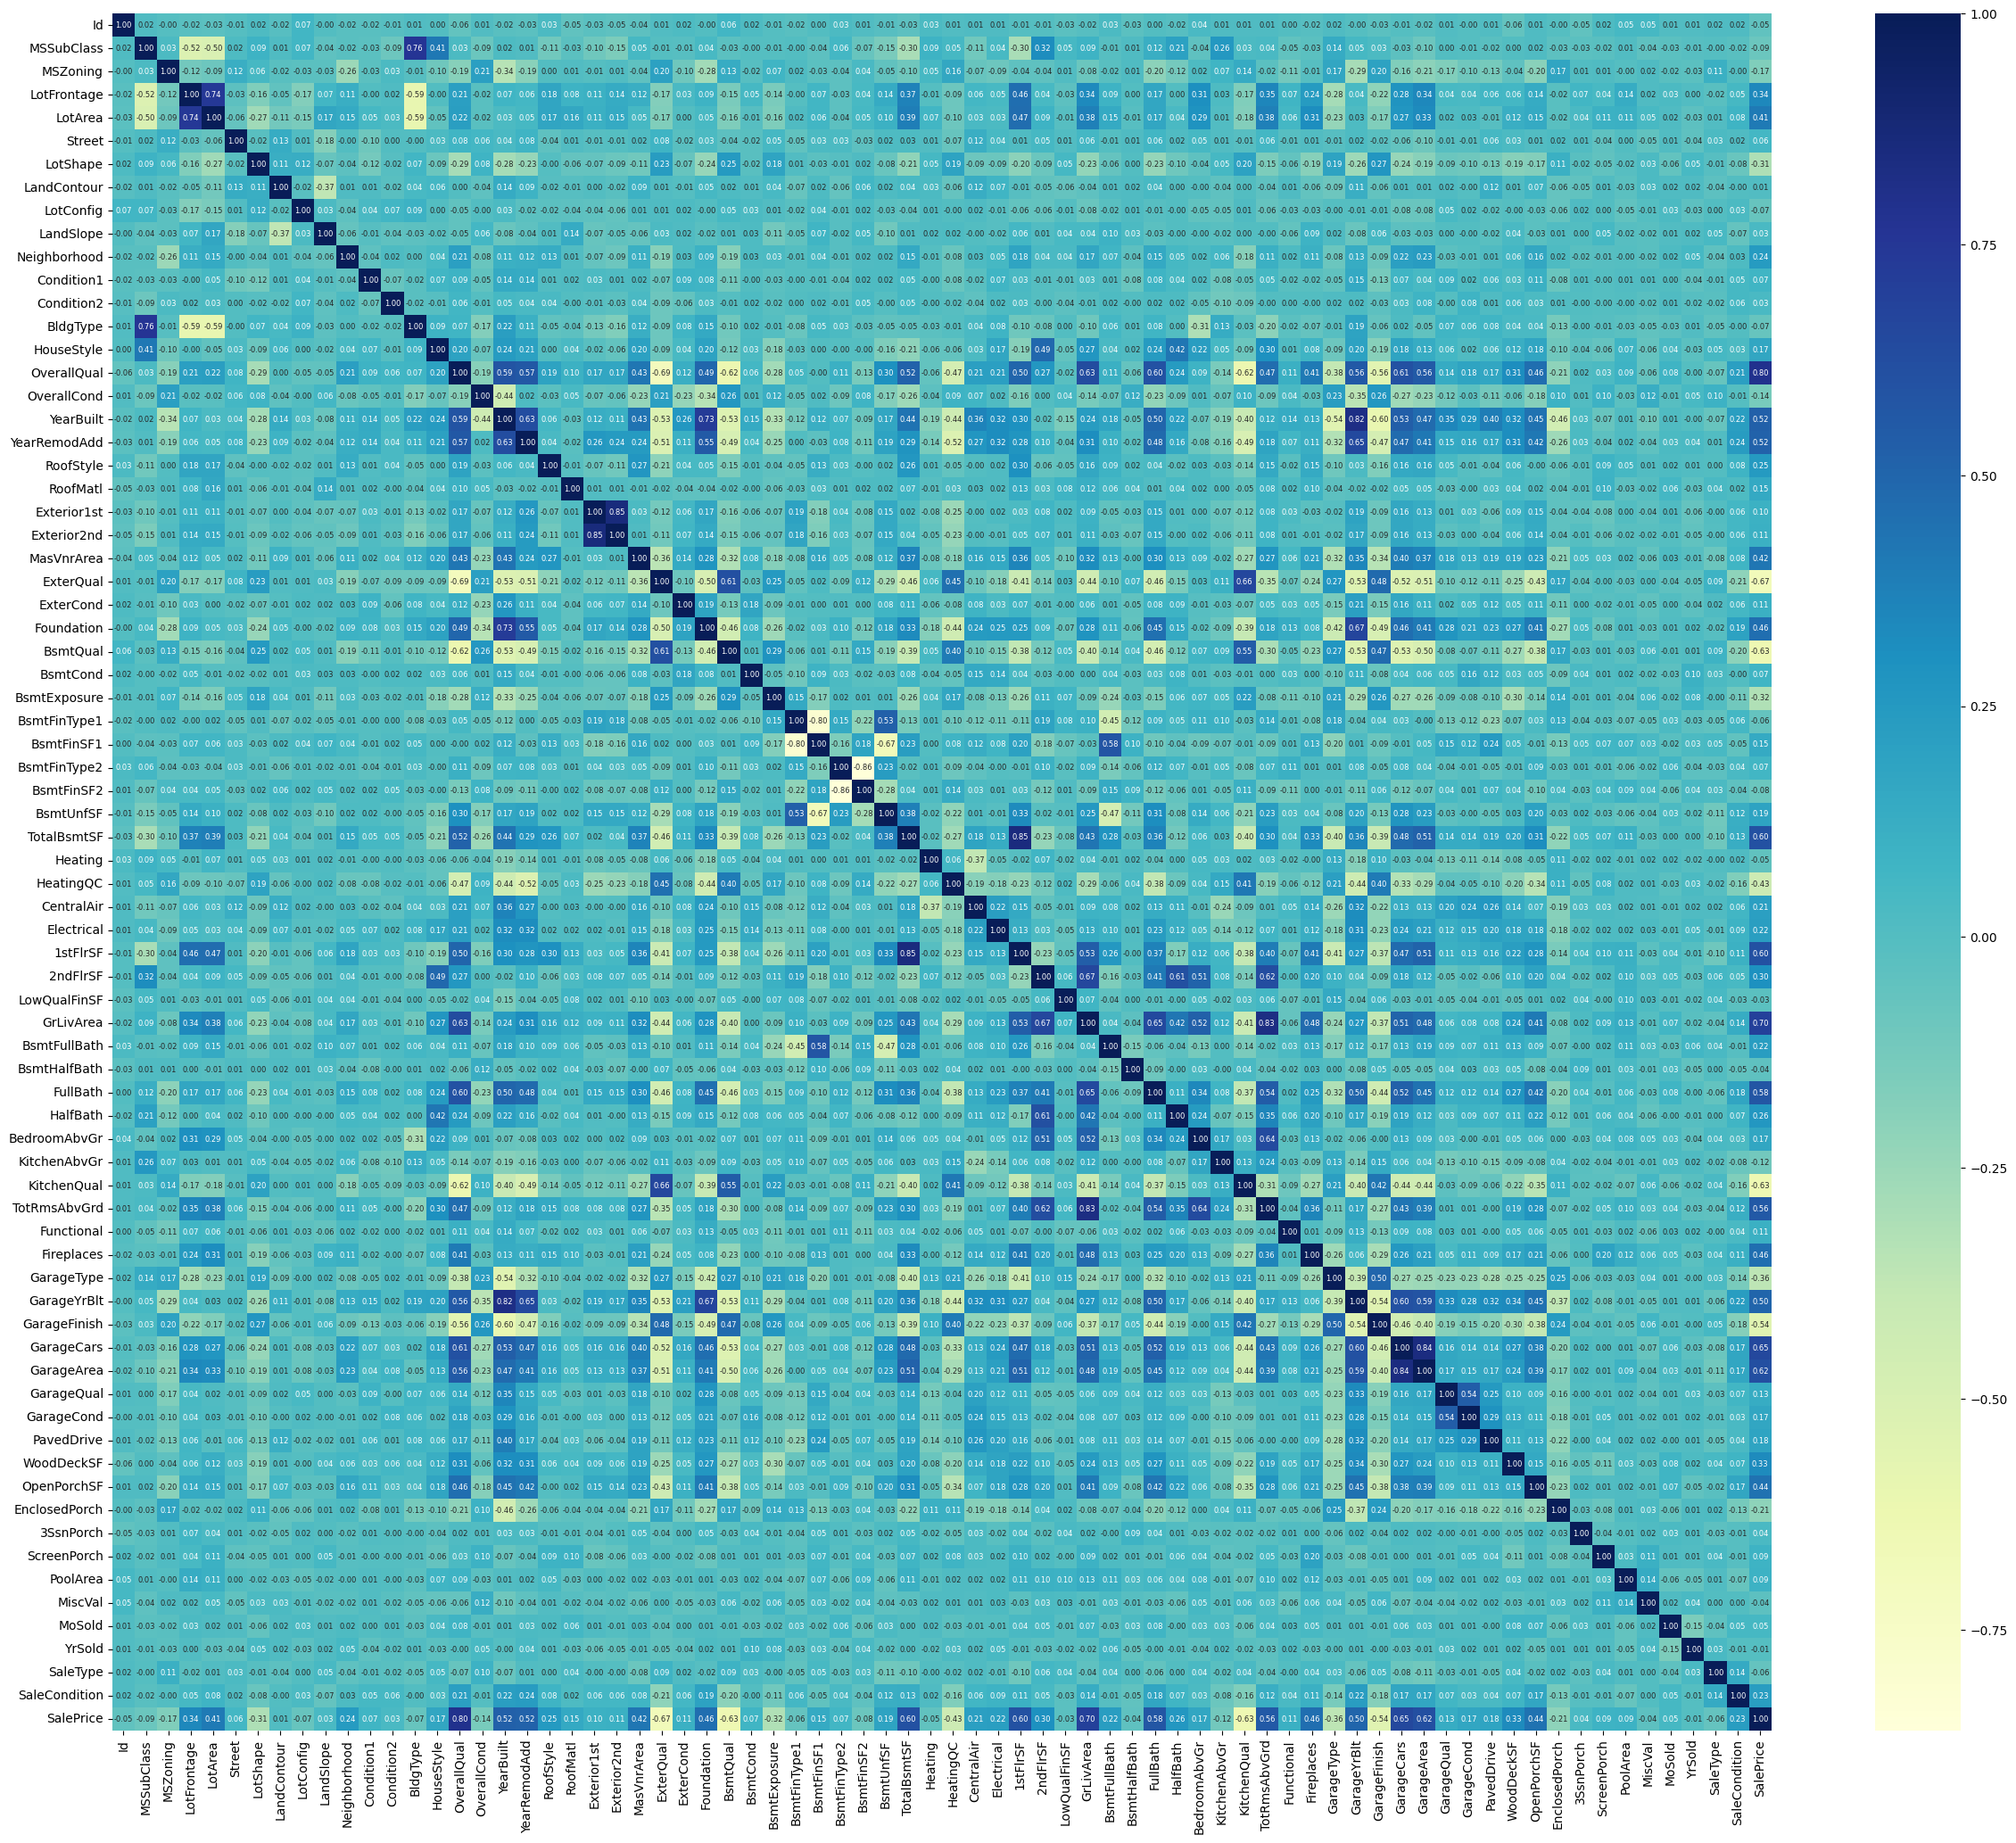

In [ ]:
plt.figure(figsize=(30, 25))
sb.heatmap(data3.corr(), cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size":6})
plt.show()

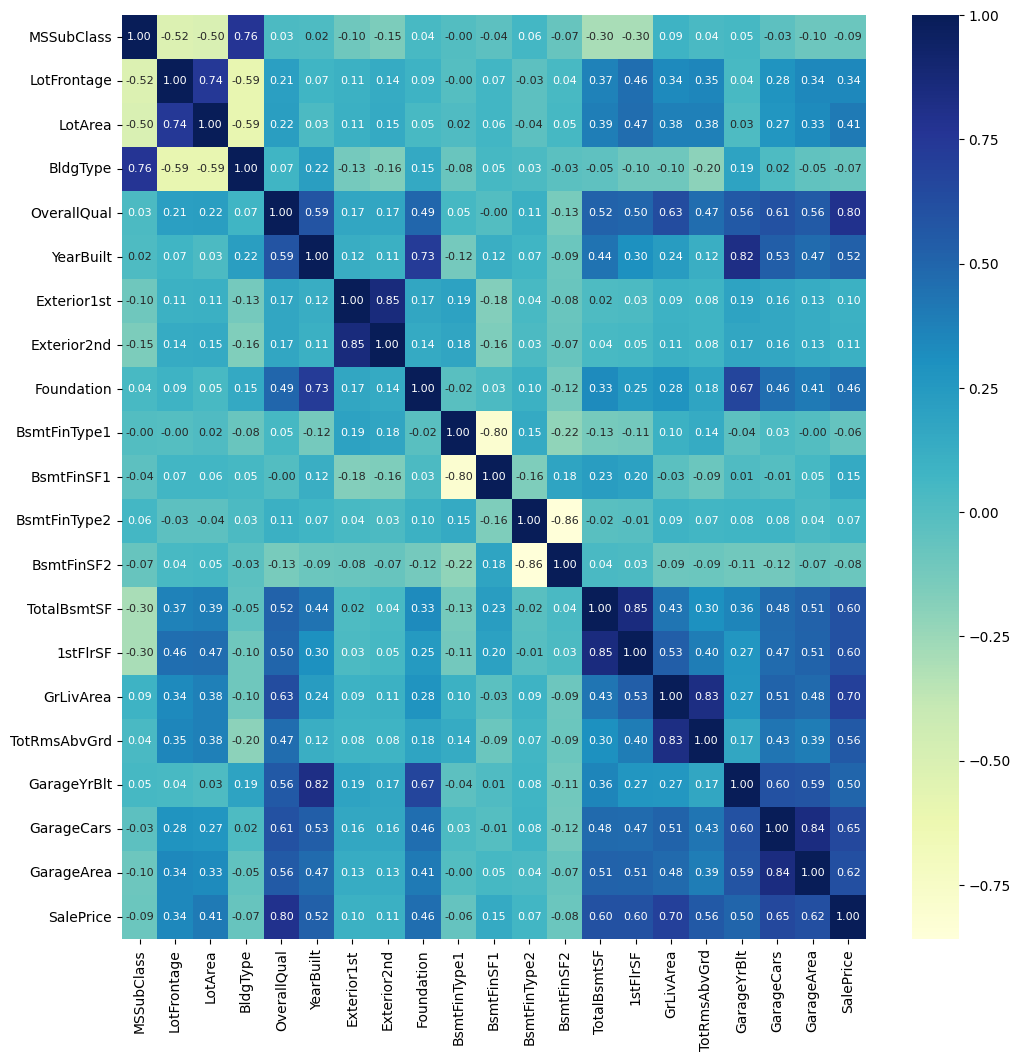

In [ ]:
# Compute correlation matrix
corr = data3.corr()

# Make a copy and set diagonal to 0 so it doesn't count
corr_no_diag = corr.copy()
np.fill_diagonal(corr_no_diag.values, 0)

# Identify columns with at least one strong correlation (ignoring diagonal)
strong_cols = corr_no_diag.columns[(corr_no_diag >= 0.7).any() | (corr_no_diag <= -0.7).any()]

# Keep all rows and columns for these selected columns
filtered_corr = corr.loc[strong_cols, strong_cols]

plt.figure(figsize=(12, 12))
sb.heatmap(filtered_corr, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size":8}, cbar=True)
plt.show()

In [ ]:
print("High Correlation Columns")
print(strong_cols)

High Correlation Columns
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'BldgType', 'OverallQual',
       'YearBuilt', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


In [ ]:
# X_train = data3.drop('SalePrice', axis=1)
# y_train = data3['SalePrice']


In [ ]:
def compute_metrics(y_true, y_pred, n, p):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mbe = np.mean(y_true - y_pred)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    expl_var = explained_variance_score(y_true, y_pred)
    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MedianAE": medae,
        "MAPE": mape,
        "MBE": mbe,
        "R2": r2,
        "Adjusted R2": adjusted_r2,
        "Explained Variance": expl_var
    }

Linear Regression


Linear Regression Metrics:
MSE: 980010357.9243575
RMSE: 31305.117120438274
MAE: 20666.228610974806
MedianAE: 13950.25317420192
MAPE: 12.242205997900735
MBE: -1459.6757711502792
R2: 0.8697208071712571
Adjusted R2: 0.8041319721609245
Explained Variance: 0.8700040488709881


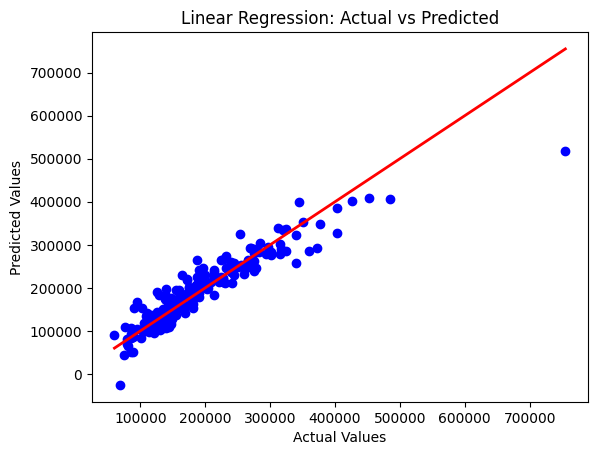

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, explained_variance_score
import numpy as np

# Features and target from train.csv
X = data3.drop('SalePrice', axis=1)
y = data3['SalePrice']

# Split train.csv into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Number of samples and features
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]

model_metrics = {}
model_metrics["Linear Regression"] = compute_metrics(y_test, y_pred, n, p)


for model_name, metrics in model_metrics.items():
    if model_name == "Linear Regression":
        print(f"\n{model_name} Metrics:")
        for metric_name, value in metrics.items():
          print(f"{metric_name}: {value}")



plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


K-Nearest Neighbor(KNN)


K Nearest Neighbors (KNN) Metrics:
MSE: 1786879397.4121323
RMSE: 42271.49627600296
MAE: 23806.010273972603
MedianAE: 15433.333333333343
MAPE: 13.314181299917733
MBE: 2928.3131659056307
R2: 0.762458423327061
Adjusted R2: 0.6428685261055125
Explained Variance: 0.76359835660857


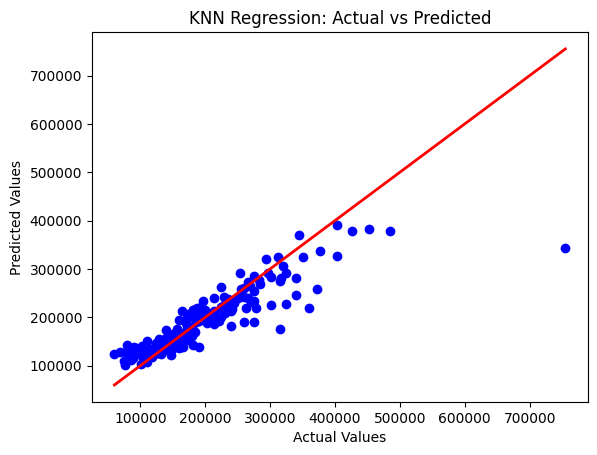

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

knn = KNeighborsRegressor(n_neighbors=12, metric = 'euclidean')


knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

# Number of samples and features
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]

model_metrics["K Nearest Neighbors (KNN)"] = compute_metrics(y_test, y_pred, n, p)


for model_name, metrics in model_metrics.items():
    if model_name == "K Nearest Neighbors (KNN)":
        print(f"\n{model_name} Metrics:")
        for metric_name, value in metrics.items():
          print(f"{metric_name}: {value}")

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression: Actual vs Predicted")
plt.show()

Random Forest


Random Forest Regressor Metrics:
MSE: 1061044498.990306
RMSE: 32573.67800832915
MAE: 22975.983649498048
MedianAE: 17195.340977474174
MAPE: 13.929355910406816
MBE: -3227.292115805308
R2: 0.8589484082835536
Adjusted R2: 0.7879362276263081
Explained Variance: 0.8603329975076707


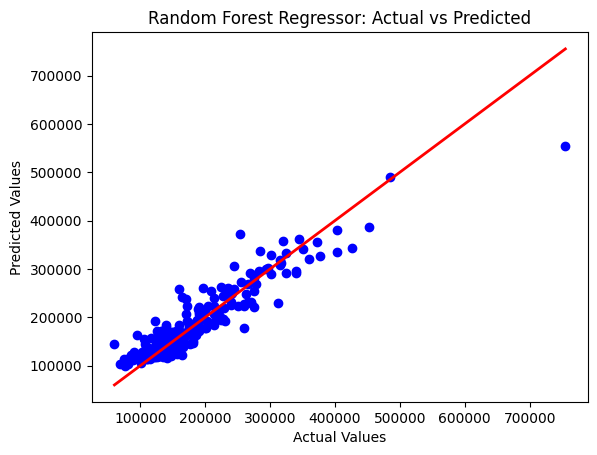

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

# Number of samples and features
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]


model_metrics["Random Forest Regressor"] = compute_metrics(y_test, y_pred, n, p)


for model_name, metrics in model_metrics.items():
    if model_name == "Random Forest Regressor":
        print(f"\n{model_name} Metrics:")
        for metric_name, value in metrics.items():
          print(f"{metric_name}: {value}")

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.show()

Neural Network


Neural Network Metrics:
MSE: 815187356.018818
RMSE: 28551.48605622513
MAE: 20119.844274149425
MedianAE: 14922.494064927072
MAPE: 11.948145930700802
MBE: -992.617377425797
R2: 0.8916318078808245
Adjusted R2: 0.8370740284001361
Explained Variance: 0.891762788832396


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


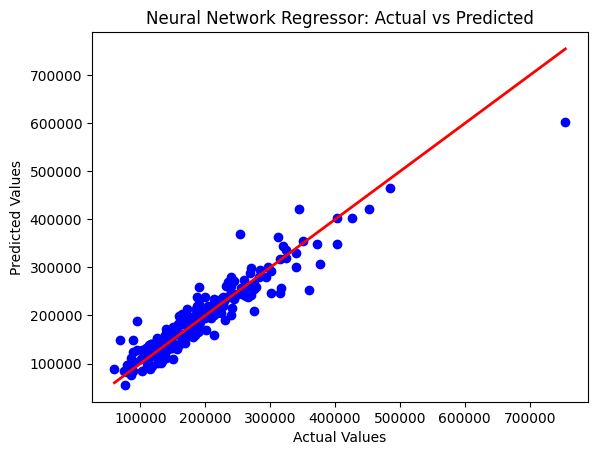

In [ ]:
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)

nn_model.fit(X_train_scaled, y_train)

y_pred = nn_model.predict(X_test_scaled)

# Number of samples and features
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]

model_metrics["Neural Network"] = compute_metrics(y_test, y_pred, n, p)


for model_name, metrics in model_metrics.items():
    if model_name == "Neural Network":
        print(f"\n{model_name} Metrics:")
        for metric_name, value in metrics.items():
          print(f"{metric_name}: {value}")

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Neural Network Regressor: Actual vs Predicted")
plt.show()

Deep Neural Network

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 39754678272.0000 - val_loss: 41677484032.0000
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42093080576.0000 - val_loss: 41669046272.0000
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40708300800.0000 - val_loss: 41634766848.0000
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41136541696.0000 - val_loss: 41525882880.0000
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40896290816.0000 - val_loss: 41251704832.0000
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40975470592.0000 - val_loss: 40668266496.0000
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40460800000.0000 - val_loss: 39556280320.0000
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38503927808.0000 - val_loss: 37687255040.0000
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36420878336.0000 - val_loss: 34868723712.0000
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

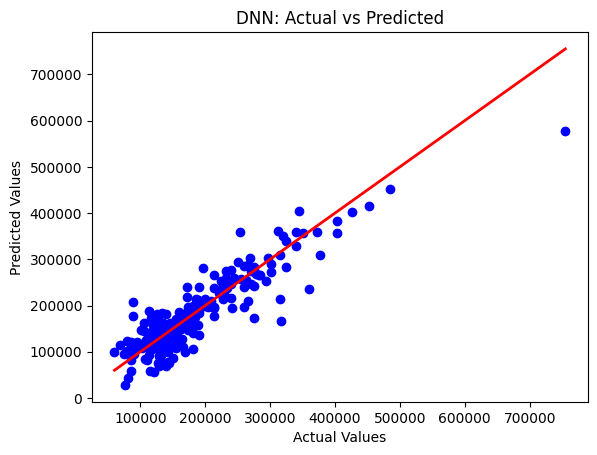

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_scaled, y_train,
                    epochs=100, batch_size=32,
                    validation_split=0.2, verbose=1)


y_pred_dnn = model.predict(X_test_scaled).ravel()   #flattens

# Number of samples and features
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]

model_metrics["Deep Neural Network"] = compute_metrics(y_test, y_pred_dnn, n, p)


for model_name, metrics in model_metrics.items():
    if model_name == "Deep Neural Network":
        print(f"\n{model_name} Metrics:")
        for metric_name, value in metrics.items():
          print(f"{metric_name}: {value}")


plt.scatter(y_test, y_pred_dnn, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("DNN: Actual vs Predicted")
plt.show()

Convolutional Neural Network (CNN)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 41695051776.0000 - val_loss: 41666744320.0000
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 39659520000.0000 - val_loss: 41575247872.0000
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 42714996736.0000 - val_loss: 41217327104.0000
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40729452544.0000 - val_loss: 40211533824.0000
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41403088896.0000 - val_loss: 37966708736.0000
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 37420945408.0000 - val_loss: 33821564928.0000
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 29935249408.0000 - val_loss: 27374850048.0000
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25397739520.0000 - val_loss: 19178969088.0000
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16567481344.0000 - val_loss: 11494139904.0000
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 103

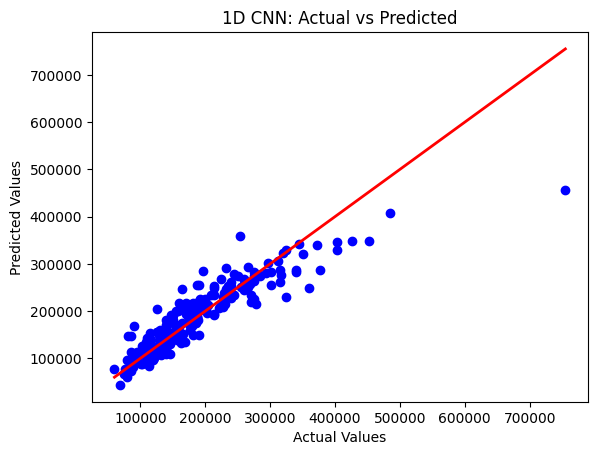

In [ ]:
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

model = keras.Sequential([
    layers.Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.Conv1D(32, kernel_size=2, activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train_cnn, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


y_pred_cnn = model.predict(X_test_cnn).ravel()

# Number of samples and features
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]

model_metrics["Convolutional Neural Network"] = compute_metrics(y_test, y_pred_cnn, n, p)


for model_name, metrics in model_metrics.items():
    if model_name == "Convolutional Neural Network":
        print(f"\n{model_name} Metrics:")
        for metric_name, value in metrics.items():
          print(f"{metric_name}: {value}")


plt.scatter(y_test, y_pred_cnn, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("1D CNN: Actual vs Predicted")
plt.show()


XGBoost


XGBoost Metrics:
MSE: 675058496.0
RMSE: 25981.887845189387
MAE: 17134.12109375
MedianAE: 11488.0625
MAPE: 9.743703359288327
MBE: -3541.171625285388
R2: 0.9102600812911987
Adjusted R2: 0.8650806739412505
Explained Variance: 0.9119270646133519


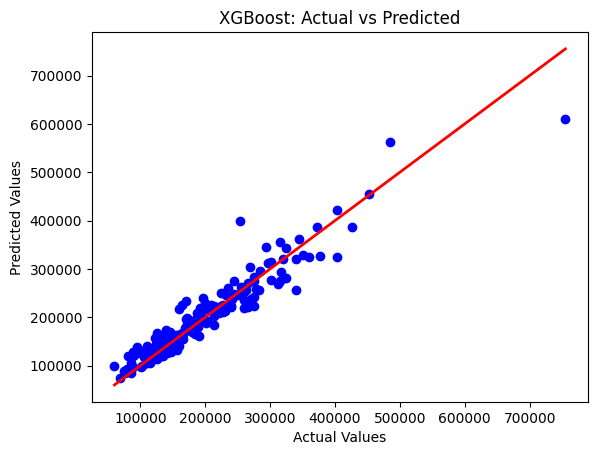

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

# Number of samples and features
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]

model_metrics["XGBoost"] = compute_metrics(y_test, y_pred_xgb, n, p)


for model_name, metrics in model_metrics.items():
    if model_name == "XGBoost":
        print(f"\n{model_name} Metrics:")
        for metric_name, value in metrics.items():
          print(f"{metric_name}: {value}")

plt.scatter(y_test, y_pred_xgb, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs Predicted")
plt.show()


In [ ]:
print(model_metrics)

{'Linear Regression': {'MSE': 980010357.9243575, 'RMSE': np.float64(31305.117120438274), 'MAE': 20666.228610974806, 'MedianAE': np.float64(13950.25317420192), 'MAPE': np.float64(12.242205997900735), 'MBE': np.float64(-1459.6757711502792), 'R2': 0.8697208071712571, 'Adjusted R2': 0.8041319721609245, 'Explained Variance': 0.8700040488709881}, 'K Nearest Neighbors (KNN)': {'MSE': 1786879397.4121323, 'RMSE': np.float64(42271.49627600296), 'MAE': 23806.010273972603, 'MedianAE': np.float64(15433.333333333343), 'MAPE': np.float64(13.314181299917733), 'MBE': np.float64(2928.3131659056307), 'R2': 0.762458423327061, 'Adjusted R2': 0.6428685261055125, 'Explained Variance': 0.76359835660857}, 'Random Forest Regressor': {'MSE': 1061044498.990306, 'RMSE': np.float64(32573.67800832915), 'MAE': 22975.983649498048, 'MedianAE': np.float64(17195.340977474174), 'MAPE': np.float64(13.929355910406816), 'MBE': np.float64(-3227.292115805308), 'R2': 0.8589484082835536, 'Adjusted R2': 0.7879362276263081, 'Expla

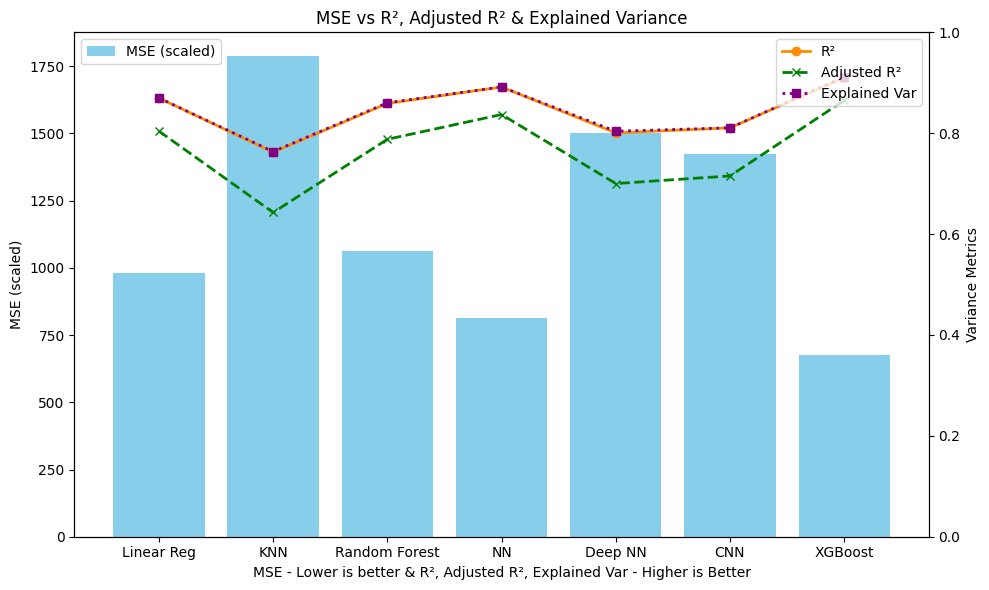

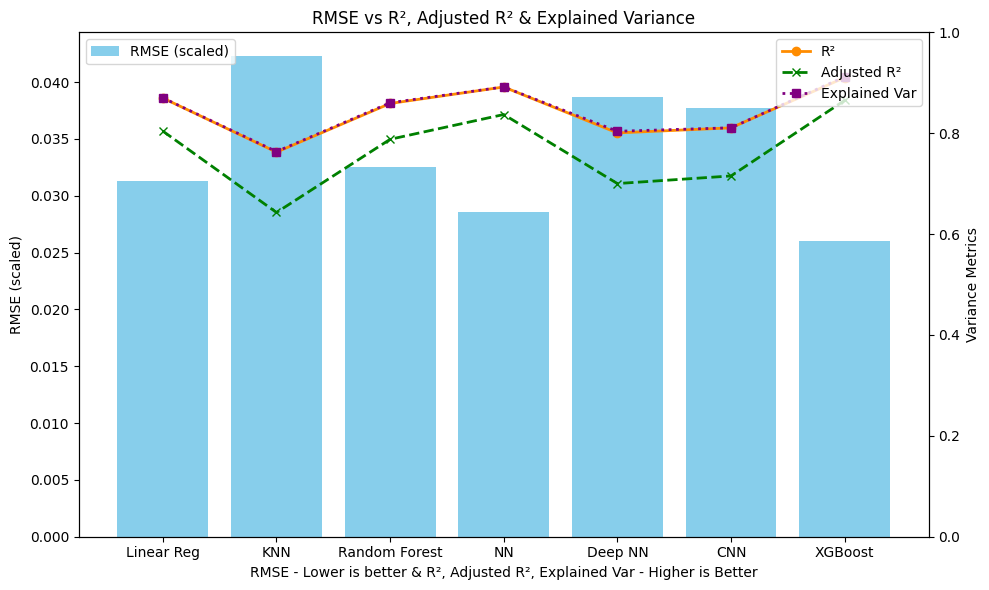

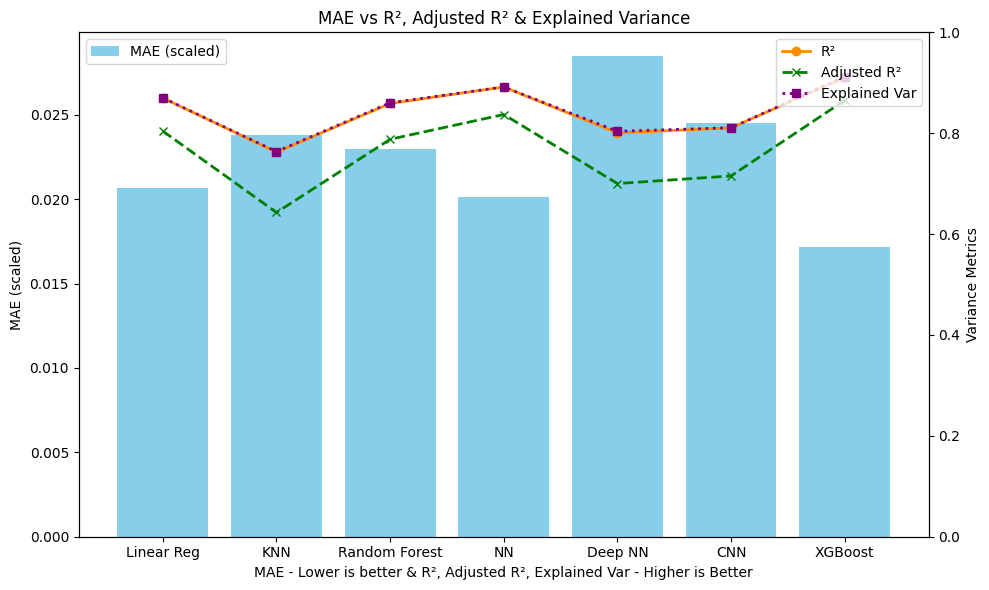

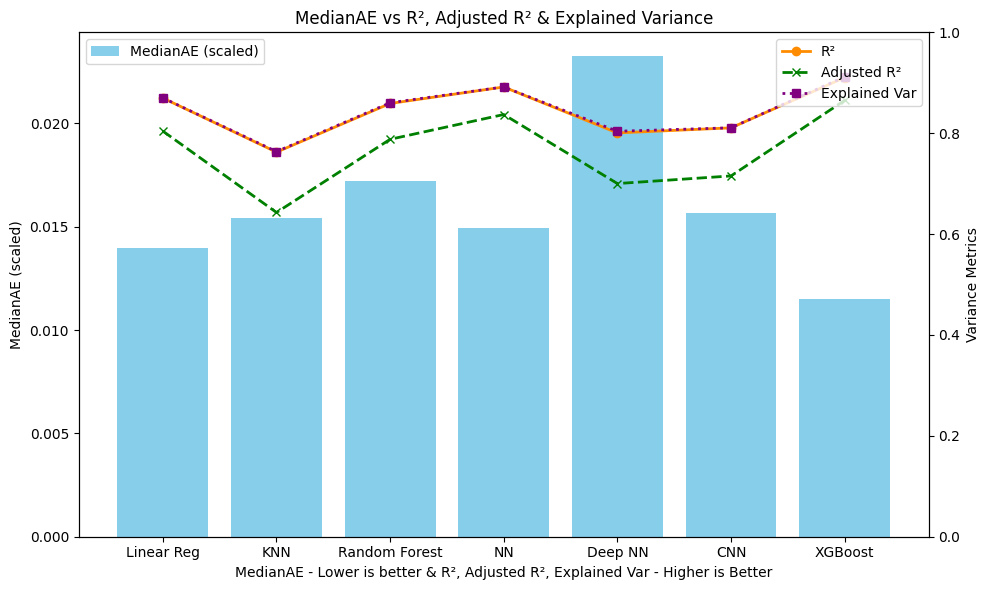

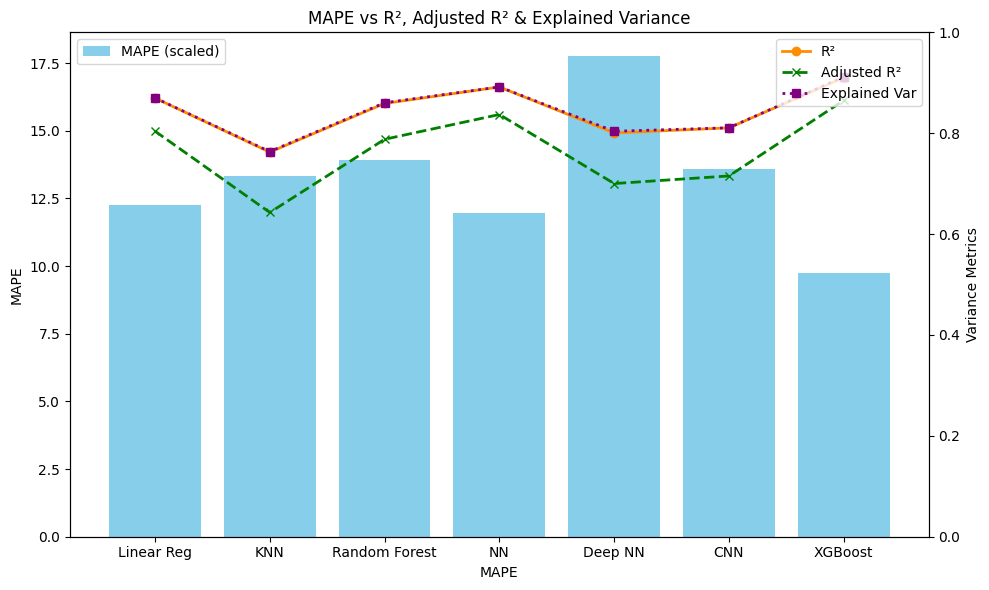

In [ ]:
# Shortened model names for cleaner x-axis
models = ["Linear Reg", "KNN", "Random Forest", "NN", "Deep NN", "CNN", "XGBoost"]

# List of error metrics to compare against R²
error_metrics = ['MSE', 'RMSE', 'MAE', 'MedianAE', 'MAPE']

# Loop through each error metric and plot vs R², Adjusted R², Explained Variance
for metric in error_metrics:
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot error metric (scaled if needed)
    values = [model_metrics[m][metric] for m in model_metrics]
    scale_factor = 1
    if metric in ['MSE', 'RMSE', 'MAE', 'MedianAE']:  # scale large numbers
        scale_factor = 1e6
    ax1.bar(models, np.array(values)/scale_factor, color='skyblue', label=f"{metric} (scaled)")
    ax1.set_ylabel(f"{metric} (scaled)" if scale_factor != 1 else metric)
    ax1.set_xlabel(f"{metric} - Lower is better & R², Adjusted R², Explained Var - Higher is Better"  if scale_factor != 1 else metric)

    ax1.set_title(f"{metric} vs R², Adjusted R² & Explained Variance")

    # Plot R², Adjusted R², and Explained Variance on secondary axis
    ax2 = ax1.twinx()
    r2 = [model_metrics[m]['R2'] for m in model_metrics]
    adj_r2 = [model_metrics[m]['Adjusted R2'] for m in model_metrics]
    expl_var = [model_metrics[m]['Explained Variance'] for m in model_metrics]

    # Use different markers and line styles
    ax2.plot(models, r2, color='darkorange', marker='o', linestyle='-', linewidth=2, label="R²")
    ax2.plot(models, adj_r2, color='green', marker='x', linestyle='--', linewidth=2, label="Adjusted R²")
    ax2.plot(models, expl_var, color='purple', marker='s', linestyle=':', linewidth=2, label="Explained Var")

    ax2.set_ylabel("Variance Metrics")
    ax2.set_ylim(0, 1)  # keep consistent y-axis


    # Legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Rotate x-axis labels slightly to reduce crowding
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

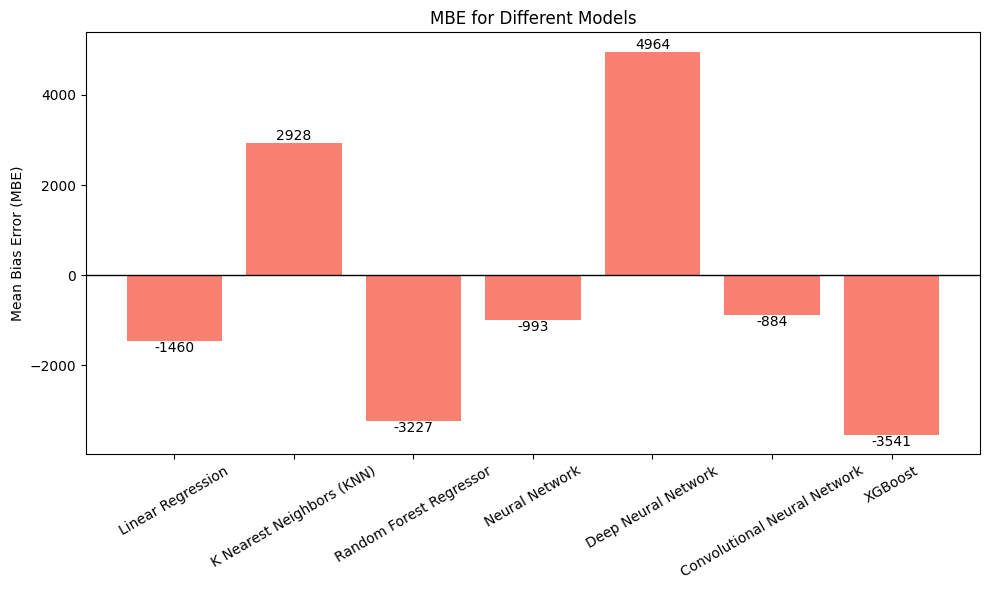

In [ ]:
models = ["Linear Regression", "K Nearest Neighbors (KNN)", "Random Forest Regressor",
          "Neural Network", "Deep Neural Network", "Convolutional Neural Network", "XGBoost"]

# Extract MBE values
mbe_values = [model_metrics[m]['MBE'] for m in models]

# Plot MBE separately
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mbe_values, color='salmon')
plt.axhline(0, color='black', linewidth=1)
plt.ylabel("Mean Bias Error (MBE)")
plt.title("MBE for Different Models")
plt.xticks(rotation=30)

# Annotate values on bars
for bar, val in zip(bars, mbe_values):
    plt.text(bar.get_x() + bar.get_width()/2, val, f"{val:.0f}",
             ha='center', va='bottom' if val >= 0 else 'top')

plt.tight_layout()
plt.show()


In [ ]:
# Convert dictionary to DataFrame
df_metrics = pd.DataFrame.from_dict(model_metrics, orient='index')

# Optional: reorder columns for readability
cols_order = ['MSE', 'RMSE', 'MAE', 'MedianAE', 'MAPE', 'MBE', 'R2', 'Adjusted R2', 'Explained Variance']
df_metrics = df_metrics[cols_order]

# Reset index to have a column for model names
df_metrics = df_metrics.reset_index().rename(columns={'index': 'Model'})

# Display the table
print(df_metrics.to_string(index=False))

                       Model          MSE         RMSE          MAE     MedianAE      MAPE          MBE       R2  Adjusted R2  Explained Variance
           Linear Regression 9.800104e+08 31305.117120 20666.228611 13950.253174 12.242206 -1459.675771 0.869721     0.804132            0.870004
   K Nearest Neighbors (KNN) 1.786879e+09 42271.496276 23806.010274 15433.333333 13.314181  2928.313166 0.762458     0.642869            0.763598
     Random Forest Regressor 1.061044e+09 32573.678008 22975.983649 17195.340977 13.929356 -3227.292116 0.858948     0.787936            0.860333
              Neural Network 8.151874e+08 28551.486056 20119.844274 14922.494065 11.948146  -992.617377 0.891632     0.837074            0.891763
         Deep Neural Network 1.500104e+09 38731.176899 28457.246094 23244.218750 17.753052  4964.065042 0.800581     0.700184            0.803857
Convolutional Neural Network 1.424519e+09 37742.806255 24487.544922 15671.281250 13.587795  -883.641838 0.810629     0.71529